In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/Titanic.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/titanic/Titanic.csv')

In [4]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **PassengerId** — уникальный идентификатор пассажира;
# **Survived** — факт выживания (1 = выжил, 0 = погиб);
# **Pclass** — класс билета/социально-экономический статус (1 = высший, 2 = средний, 3 = низший);
# **Name** — имя и фамилия пассажира;
# **Sex** — пол пассажира;
# **Age** — возраст пассажира (часть значений отсутствует);
# **SibSp** — число родных братьев/сестёр или супругов на борту;
# **Parch**  — число родителей/детей на борту.
# _______________________________________________________

# Проверим сколько пропусков в датасете

In [5]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Заполним пропуски по возрасту способом медиан

In [6]:
age_median_by_group = df.groupby(['Sex', 'Pclass'])['Age'].median()
print("Медианный возраст по группам:")
age_median_by_group

Медианный возраст по группам:


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [7]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(
    lambda x: x.fillna(x.median())
)


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Заполним пропуски по кабинам значением "Unknown"

In [9]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

# Embarked заполним более частым значением

In [11]:
# Находим наиболее частый порт посадки
most_common_embarked = df['Embarked'].mode()[0]
print(f"Наиболее частый порт посадки: '{most_common_embarked}'")

df['Embarked'] = df['Embarked'].fillna(most_common_embarked)

Наиболее частый порт посадки: 'S'


In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Сделаем визуализацию по числу погибших, выживших и сколько выжило женщин и мужчин.

Число выживших: 342
Число погибших: 549
Общее число пассажиров: 891
Процент выживших: 38.4%


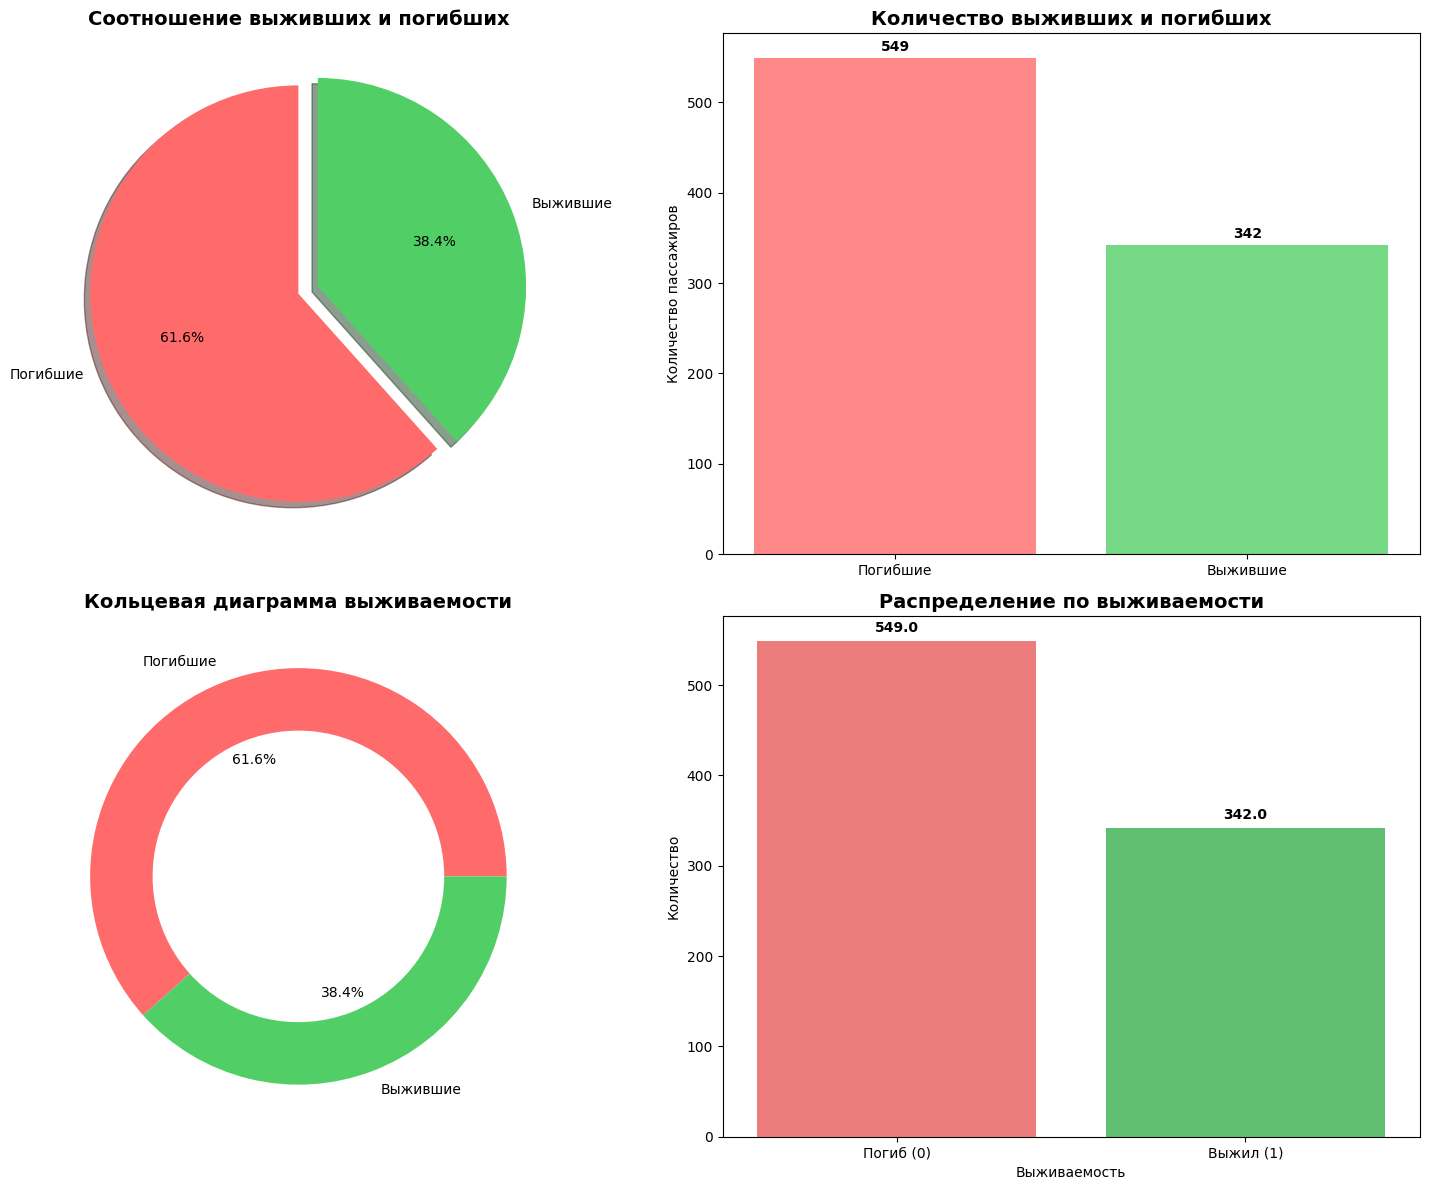

In [13]:
# Число выживших
survived_count = df['Survived'].sum()
died_count = len(df) - survived_count
total_count = len(df)

print(f"Число выживших: {survived_count}")
print(f"Число погибших: {died_count}")
print(f"Общее число пассажиров: {total_count}")
print(f"Процент выживших: {survived_count/total_count*100:.1f}%")

# Создаем визуализацию
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Круговая диаграмма
labels = ['Погибшие', 'Выжившие']
sizes = [died_count, survived_count]
colors = ['#ff6b6b', '#51cf66']
explode = (0, 0.1)

axes[0,0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
              shadow=True, startangle=90)
axes[0,0].set_title('Соотношение выживших и погибших', fontsize=14, fontweight='bold')

# 2. Столбчатая диаграмма
bars = axes[0,1].bar(labels, [died_count, survived_count], color=colors, alpha=0.8)
axes[0,1].set_title('Количество выживших и погибших', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Количество пассажиров')

# Добавляем числа на столбцы
for bar in bars:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 5,
                  f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 3. Donut chart
axes[1,0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
              wedgeprops=dict(width=0.3))
axes[1,0].set_title('Кольцевая диаграмма выживаемости', fontsize=14, fontweight='bold')

# 4. Простая визуализация с seaborn
sns.countplot(data=df, x='Survived', ax=axes[1,1], palette=colors)
axes[1,1].set_title('Распределение по выживаемости', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Выживаемость')
axes[1,1].set_ylabel('Количество')
axes[1,1].set_xticklabels(['Погиб (0)', 'Выжил (1)'])

# Добавляем числа на столбцы seaborn
for p in axes[1,1].patches:
    axes[1,1].annotate(f'{p.get_height()}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points',
                      fontweight='bold')

plt.tight_layout()
plt.show()

In [14]:
# Детальная статистика
survival_rate = df['Survived'].mean() * 100

print("📊 ДЕТАЛЬНАЯ СТАТИСТИКА ВЫЖИВАЕМОСТИ:")
print("="*40)
print(f"Всего пассажиров: {total_count:>10}")
print(f"Выживших: {survived_count:>16} ({survival_rate:5.1f}%)")
print(f"Погибших: {died_count:>17} ({100-survival_rate:5.1f}%)")
print("="*40)

📊 ДЕТАЛЬНАЯ СТАТИСТИКА ВЫЖИВАЕМОСТИ:
Всего пассажиров:        891
Выживших:              342 ( 38.4%)
Погибших:               549 ( 61.6%)


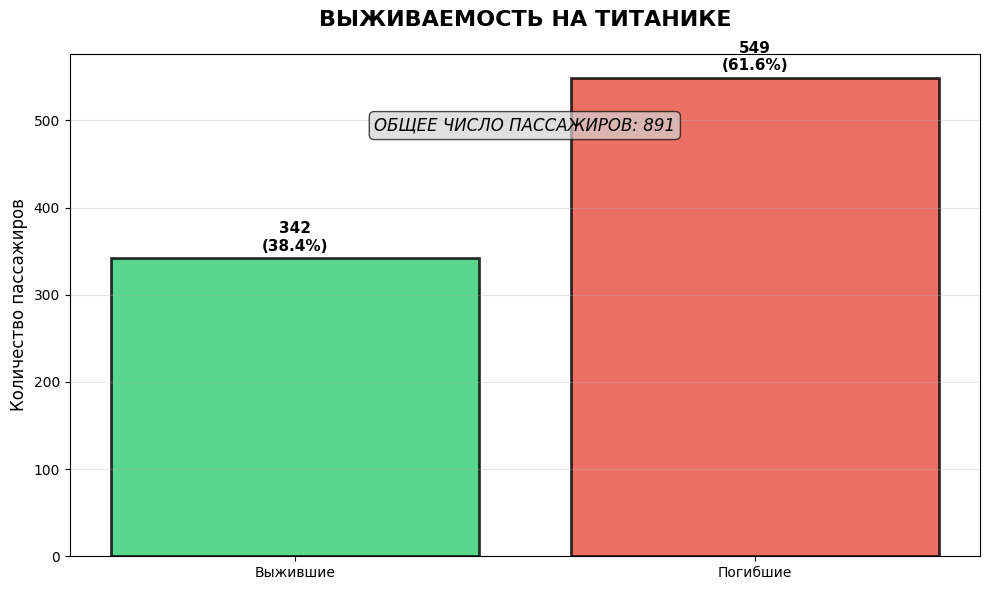

In [15]:
# Альтернативная визуализация с большим акцентом
plt.figure(figsize=(10, 6))

# Создаем данные для графика
categories = ['Выжившие', 'Погибшие']
values = [survived_count, died_count]
colors = ['#2ecc71', '#e74c3c']

# График с анимационным стилем
bars = plt.bar(categories, values, color=colors, alpha=0.8, edgecolor='black', linewidth=2)

# Настройки графика
plt.title('ВЫЖИВАЕМОСТЬ НА ТИТАНИКЕ', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            f'{value}\n({value/total_count*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# Добавляем общее количество
plt.text(0.5, max(values) * 0.9, f'ОБЩЕЕ ЧИСЛО ПАССАЖИРОВ: {total_count}',
         ha='center', va='center', fontsize=12, style='italic',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))

plt.tight_layout()
plt.show()

# **Гипотеза:** 
# Я считаю, что на «Титанике» выжило больше женщин, чем мужчин.

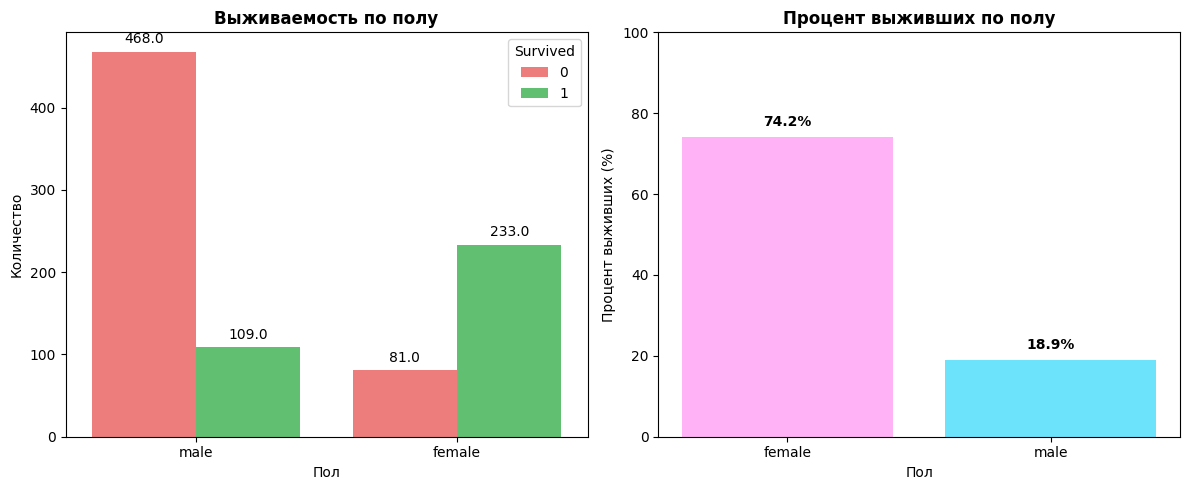


📈 ВЫЖИВАЕМОСТЬ ПО ПОЛУ:
male: 109 из 577 ( 18.9%)
female: 233 из 314 ( 74.2%)


In [16]:
# Анализ выживаемости по полу
plt.figure(figsize=(12, 5))

# График 1: Количество по полу и выживаемости
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Sex', hue='Survived', palette=['#ff6b6b', '#51cf66'])
plt.title('Выживаемость по полу', fontweight='bold')
plt.xlabel('Пол')
plt.ylabel('Количество')

# Добавляем числа на столбцы
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

# График 2: Процент выживших по полу
plt.subplot(1, 2, 2)
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
bars = plt.bar(survival_by_sex.index, survival_by_sex.values, 
               color=['#ff9ff3', '#48dbfb'], alpha=0.8)
plt.title('Процент выживших по полу', fontweight='bold')
plt.xlabel('Пол')
plt.ylabel('Процент выживших (%)')
plt.ylim(0, 100)

# Добавляем проценты на столбцы
for bar, percentage in zip(bars, survival_by_sex.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
            f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Статистика по полу
print("\n📈 ВЫЖИВАЕМОСТЬ ПО ПОЛУ:")
print("="*35)
for sex in df['Sex'].unique():
    sex_data = df[df['Sex'] == sex]
    survived_sex = sex_data['Survived'].sum()
    total_sex = len(sex_data)
    percentage = survived_sex / total_sex * 100
    print(f"{sex}: {survived_sex:>3} из {total_sex:>3} ({percentage:5.1f}%)")
print("="*35)

# Гипотеза подтвердилась: в процентном соотношении выжило больше женщин, чем мужчин, так как первыми сажали женщин и детей.

# **Гипотеза:**
# Чем выше класс, тем выше шанс выживаемости

ВЫЖИВАЕМОСТЬ ПО КЛАССАМ:
1 класс: 136 из 216 ( 63.0%)
2 класс:  87 из 184 ( 47.3%)
3 класс: 119 из 491 ( 24.2%)

РАСПРЕДЕЛЕНИЕ МУЖЧИН И ЖЕНЩИН ПО КЛАССАМ:
1 класс: Всего 216 пассажиров
  Мужчины: 122 (56.5%)
  Женщины: 94 (43.5%)
------------------------------
2 класс: Всего 184 пассажиров
  Мужчины: 108 (58.7%)
  Женщины: 76 (41.3%)
------------------------------
3 класс: Всего 491 пассажиров
  Мужчины: 347 (70.7%)
  Женщины: 144 (29.3%)
------------------------------

ОБЩАЯ СТАТИСТИКА:
Всего мужчин: 577 (64.8%)
Всего женщин: 314 (35.2%)


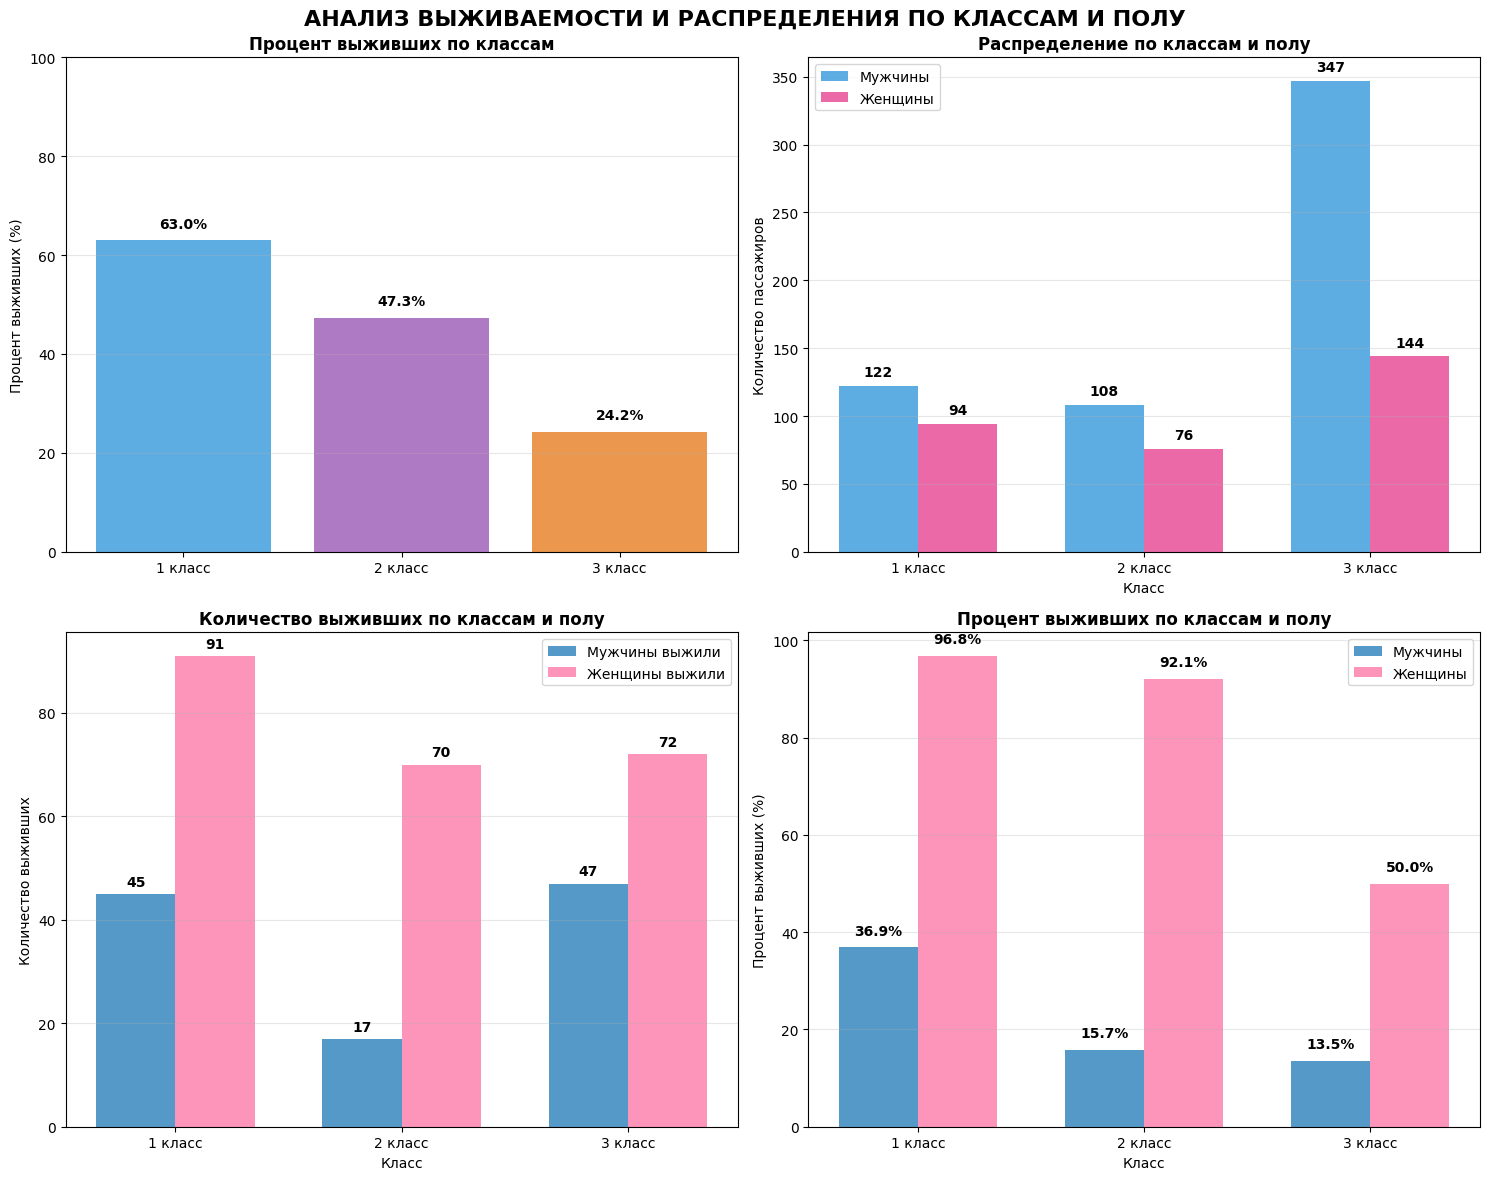


🎯 КЛЮЧЕВЫЕ ВЫВОДЫ:
• Лучшая выживаемость: 1 класс (63.0%)
• Худшая выживаемость: 3 класс (24.2%)
• Больше всего пассажиров: 3 класс
• Наивысшая выживаемость мужчин: 36.9%
• Наивысшая выживаемость женщин: 96.8%


In [17]:
# Анализ выживаемости по классам
class1 = df[df['Pclass'] == 1]
survived1 = class1['Survived'].sum()
total1 = len(class1)

class2 = df[df['Pclass'] == 2]
survived2 = class2['Survived'].sum()
total2 = len(class2)

class3 = df[df['Pclass'] == 3]
survived3 = class3['Survived'].sum()
total3 = len(class3)

print("ВЫЖИВАЕМОСТЬ ПО КЛАССАМ:")
print("="*40)
print(f"1 класс: {survived1:>3} из {total1:>3} ({survived1/total1*100:5.1f}%)")
print(f"2 класс: {survived2:>3} из {total2:>3} ({survived2/total2*100:5.1f}%)")
print(f"3 класс: {survived3:>3} из {total3:>3} ({survived3/total3*100:5.1f}%)")
print("="*40)

# Анализ распределения по полу и классам
print("\nРАСПРЕДЕЛЕНИЕ МУЖЧИН И ЖЕНЩИН ПО КЛАССАМ:")
print("="*50)

men_counts = []
women_counts = []
men_survived = []
women_survived = []

for pclass in [1, 2, 3]:
    class_data = df[df['Pclass'] == pclass]
    total = len(class_data)
    men = len(class_data[class_data['Sex'] == 'male'])
    women = len(class_data[class_data['Sex'] == 'female'])
    
    men_data = class_data[class_data['Sex'] == 'male']
    women_data = class_data[class_data['Sex'] == 'female']
    
    men_counts.append(men)
    women_counts.append(women)
    men_survived.append(men_data['Survived'].sum())
    women_survived.append(women_data['Survived'].sum())
    
    print(f"{pclass} класс: Всего {total} пассажиров")
    print(f"  Мужчины: {men} ({men/total*100:.1f}%)")
    print(f"  Женщины: {women} ({women/total*100:.1f}%)")
    print("-" * 30)

# Общая статистика
total_men = len(df[df['Sex'] == 'male'])
total_women = len(df[df['Sex'] == 'female'])
print(f"\nОБЩАЯ СТАТИСТИКА:")
print(f"Всего мужчин: {total_men} ({total_men/len(df)*100:.1f}%)")
print(f"Всего женщин: {total_women} ({total_women/len(df)*100:.1f}%)")

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('АНАЛИЗ ВЫЖИВАЕМОСТИ И РАСПРЕДЕЛЕНИЯ ПО КЛАССАМ И ПОЛУ', 
             fontsize=16, fontweight='bold')

# 1. Выживаемость по классам
classes = ['1 класс', '2 класс', '3 класс']
survived = [survived1, survived2, survived3]
total = [total1, total2, total3]
survival_rates = [survived1/total1*100, survived2/total2*100, survived3/total3*100]

bars1 = axes[0,0].bar(classes, survival_rates, color=['#3498db', '#9b59b6', '#e67e22'], alpha=0.8)
axes[0,0].set_title('Процент выживших по классам', fontweight='bold')
axes[0,0].set_ylabel('Процент выживших (%)')
axes[0,0].set_ylim(0, 100)
axes[0,0].grid(axis='y', alpha=0.3)

for bar, rate in zip(bars1, survival_rates):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                  f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

# 2. Распределение по классам и полу
x = np.arange(len(classes))
width = 0.35

bars2_men = axes[0,1].bar(x - width/2, men_counts, width, label='Мужчины', color='#3498db', alpha=0.8)
bars2_women = axes[0,1].bar(x + width/2, women_counts, width, label='Женщины', color='#e84393', alpha=0.8)
axes[0,1].set_title('Распределение по классам и полу', fontweight='bold')
axes[0,1].set_xlabel('Класс')
axes[0,1].set_ylabel('Количество пассажиров')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(classes)
axes[0,1].legend()
axes[0,1].grid(axis='y', alpha=0.3)

for i, (men, women) in enumerate(zip(men_counts, women_counts)):
    axes[0,1].text(i - width/2, men + 5, f'{men}', ha='center', va='bottom', fontweight='bold')
    axes[0,1].text(i + width/2, women + 5, f'{women}', ha='center', va='bottom', fontweight='bold')

# 3. Абсолютные числа выживших по классам и полу
bars3_men = axes[1,0].bar(x - width/2, men_survived, width, label='Мужчины выжили', color='#2980b9', alpha=0.8)
bars3_women = axes[1,0].bar(x + width/2, women_survived, width, label='Женщины выжили', color='#fd79a8', alpha=0.8)
axes[1,0].set_title('Количество выживших по классам и полу', fontweight='bold')
axes[1,0].set_xlabel('Класс')
axes[1,0].set_ylabel('Количество выживших')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(classes)
axes[1,0].legend()
axes[1,0].grid(axis='y', alpha=0.3)

for i, (men, women) in enumerate(zip(men_survived, women_survived)):
    axes[1,0].text(i - width/2, men + 1, f'{men}', ha='center', va='bottom', fontweight='bold')
    axes[1,0].text(i + width/2, women + 1, f'{women}', ha='center', va='bottom', fontweight='bold')

# 4. Процент выживших по классам и полу
men_survival_rate = []
women_survival_rate = []

for pclass in [1, 2, 3]:
    class_data = df[df['Pclass'] == pclass]
    men_data = class_data[class_data['Sex'] == 'male']
    women_data = class_data[class_data['Sex'] == 'female']
    
    men_survival = men_data['Survived'].sum() / len(men_data) * 100 if len(men_data) > 0 else 0
    women_survival = women_data['Survived'].sum() / len(women_data) * 100 if len(women_data) > 0 else 0
    
    men_survival_rate.append(men_survival)
    women_survival_rate.append(women_survival)

bars4_men = axes[1,1].bar(x - width/2, men_survival_rate, width, label='Мужчины', color='#2980b9', alpha=0.8)
bars4_women = axes[1,1].bar(x + width/2, women_survival_rate, width, label='Женщины', color='#fd79a8', alpha=0.8)
axes[1,1].set_title('Процент выживших по классам и полу', fontweight='bold')
axes[1,1].set_xlabel('Класс')
axes[1,1].set_ylabel('Процент выживших (%)')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(classes)
axes[1,1].legend()
axes[1,1].grid(axis='y', alpha=0.3)

for i, (men_rate, women_rate) in enumerate(zip(men_survival_rate, women_survival_rate)):
    axes[1,1].text(i - width/2, men_rate + 2, f'{men_rate:.1f}%', ha='center', va='bottom', fontweight='bold')
    axes[1,1].text(i + width/2, women_rate + 2, f'{women_rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Итоговые выводы
print("\n🎯 КЛЮЧЕВЫЕ ВЫВОДЫ:")
print(f"• Лучшая выживаемость: {classes[survival_rates.index(max(survival_rates))]} ({max(survival_rates):.1f}%)")
print(f"• Худшая выживаемость: {classes[survival_rates.index(min(survival_rates))]} ({min(survival_rates):.1f}%)")
print(f"• Больше всего пассажиров: {classes[[total1, total2, total3].index(max([total1, total2, total3]))]}")
print(f"• Наивысшая выживаемость мужчин: {max(men_survival_rate):.1f}%")
print(f"• Наивысшая выживаемость женщин: {max(women_survival_rate):.1f}%")

# Гипотеза подтвердилась: Шанс выжить был в первом классе, во-первых, из-за количества человек, в 3 классе ниже шансы выжить из-за того, что в 3 классе было больше всего людей, чем в первом и втором, во-вторых, я предполагаю, что женщин и мужчин с высоким классом билета сажали в лодки чаще, чем людей классом ниже, поэтому у женщин и мужчин большая выживаемость в 1 классе.

# **Гипотеза:**
# У детей более высокие шансы на выживаемость

РАСШИРЕННЫЙ АНАЛИЗ ВЫЖИВАЕМОСТИ ПО ВОЗРАСТУ И ПОЛУ


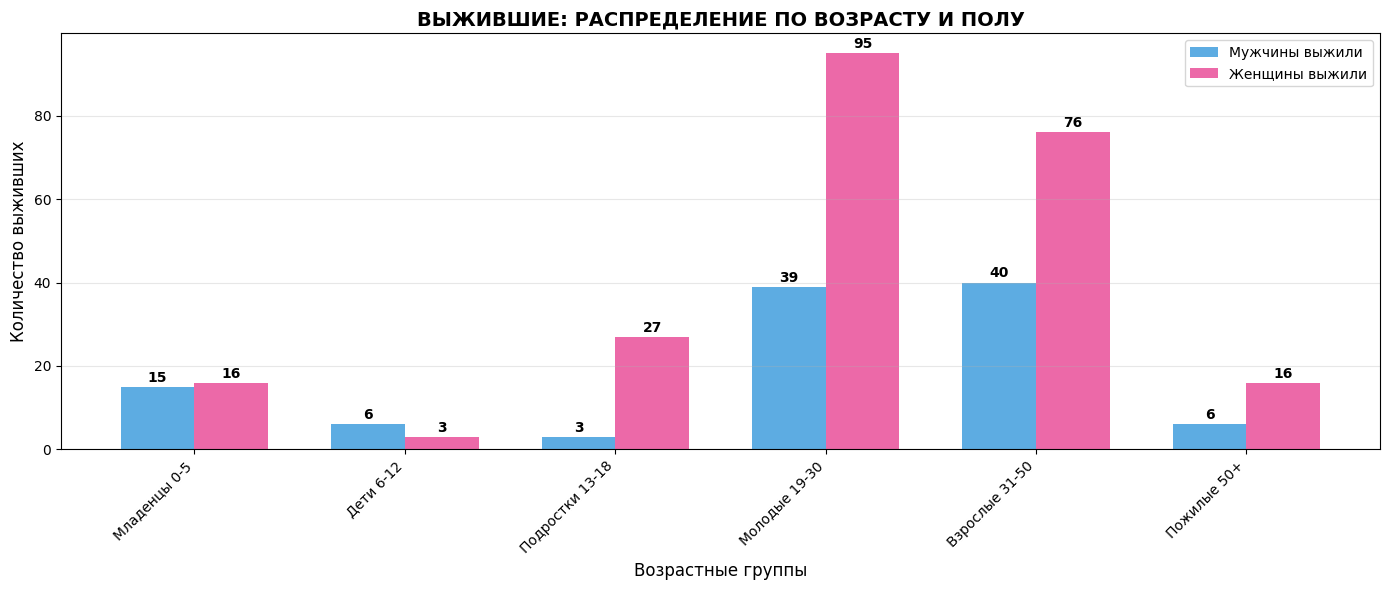

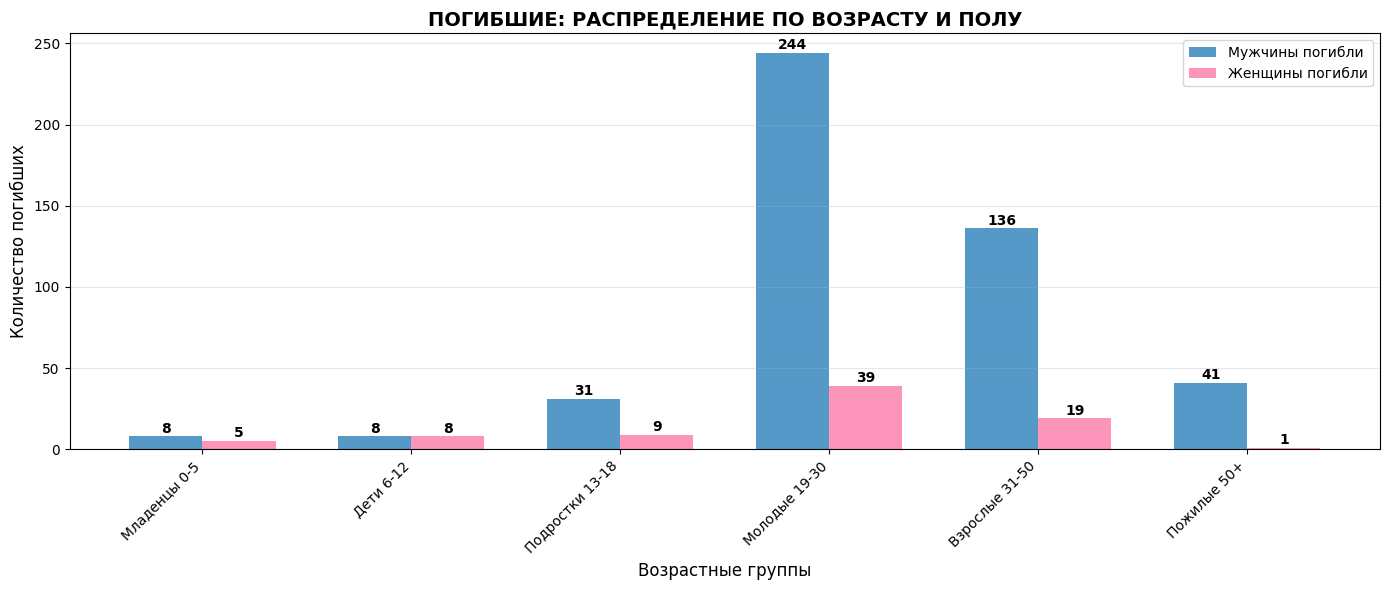

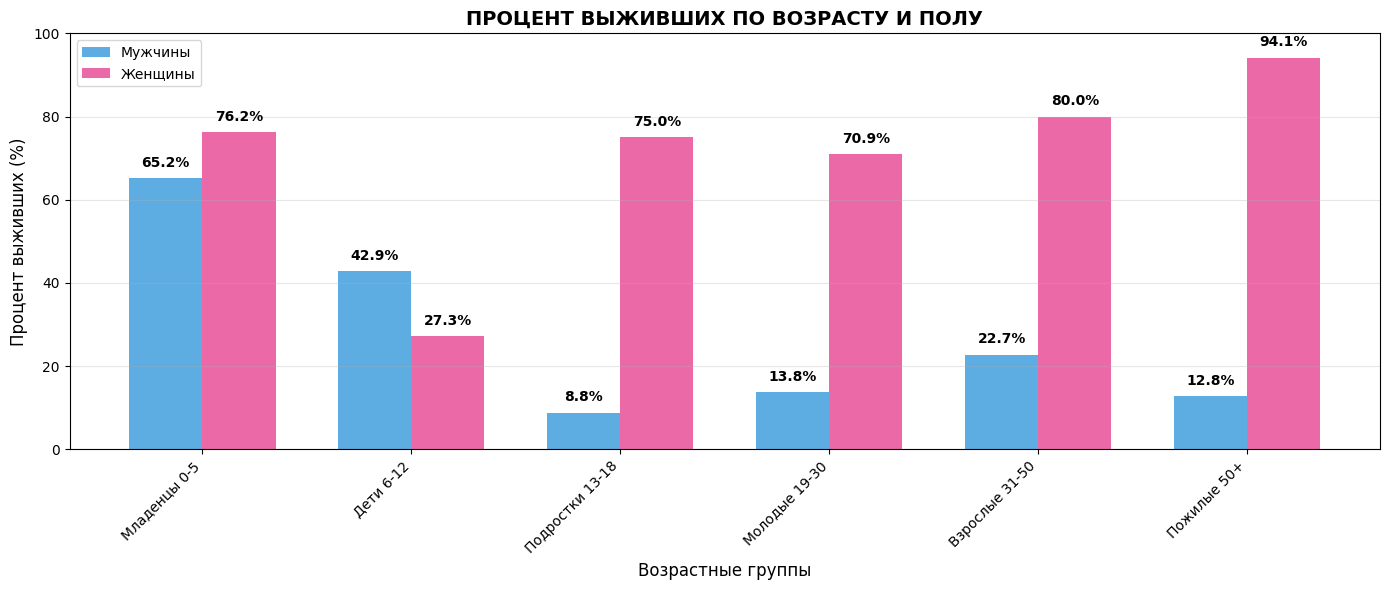

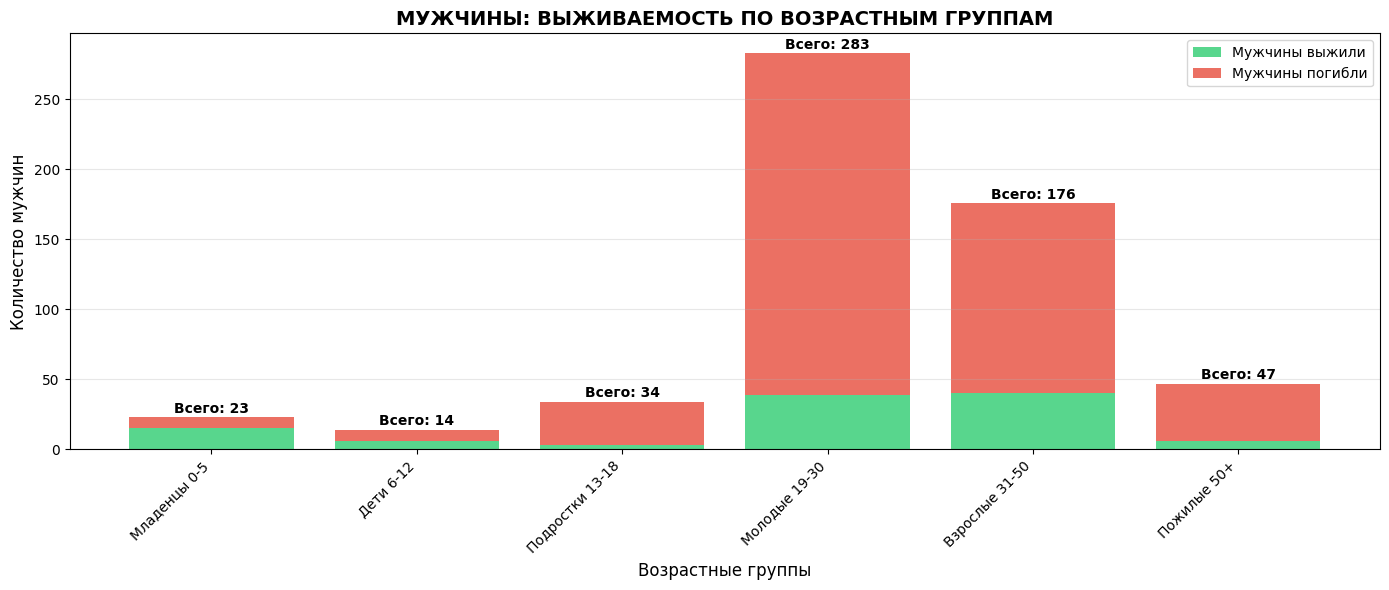

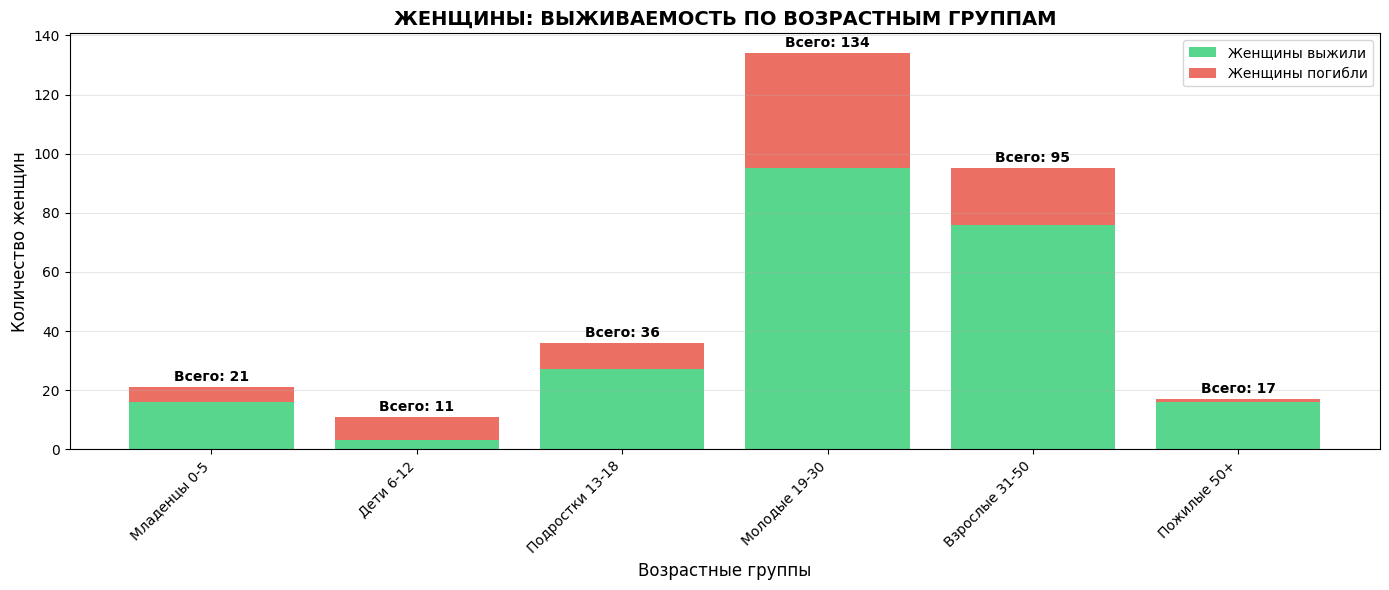

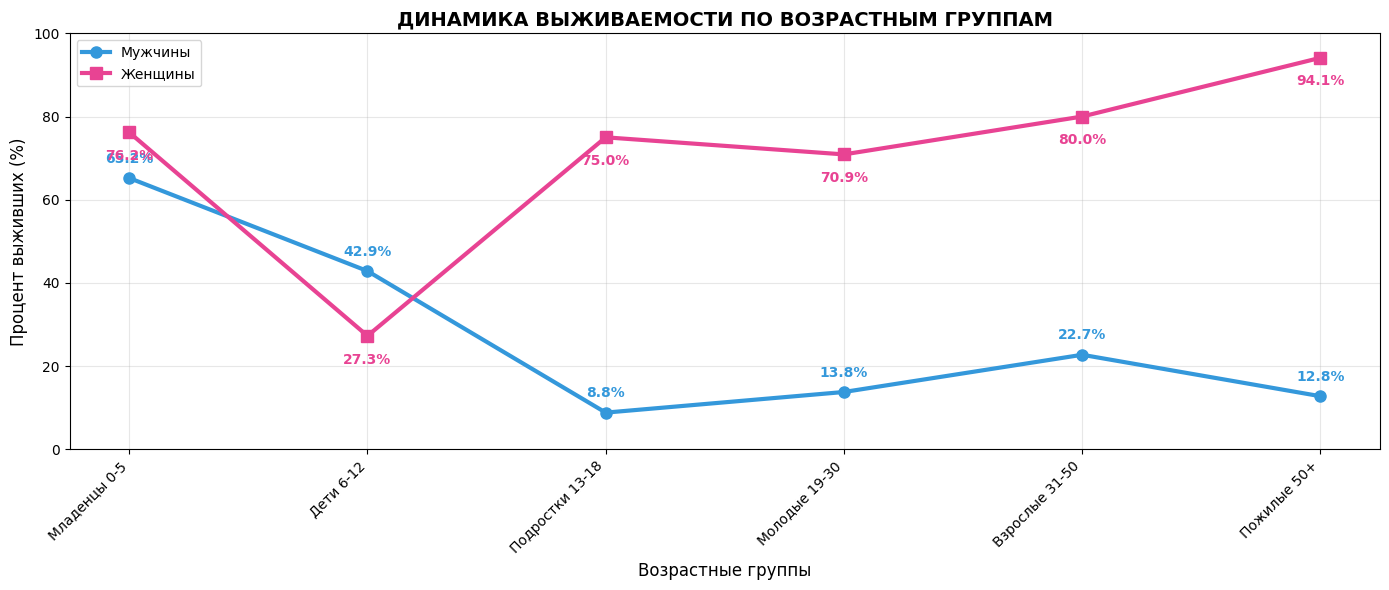

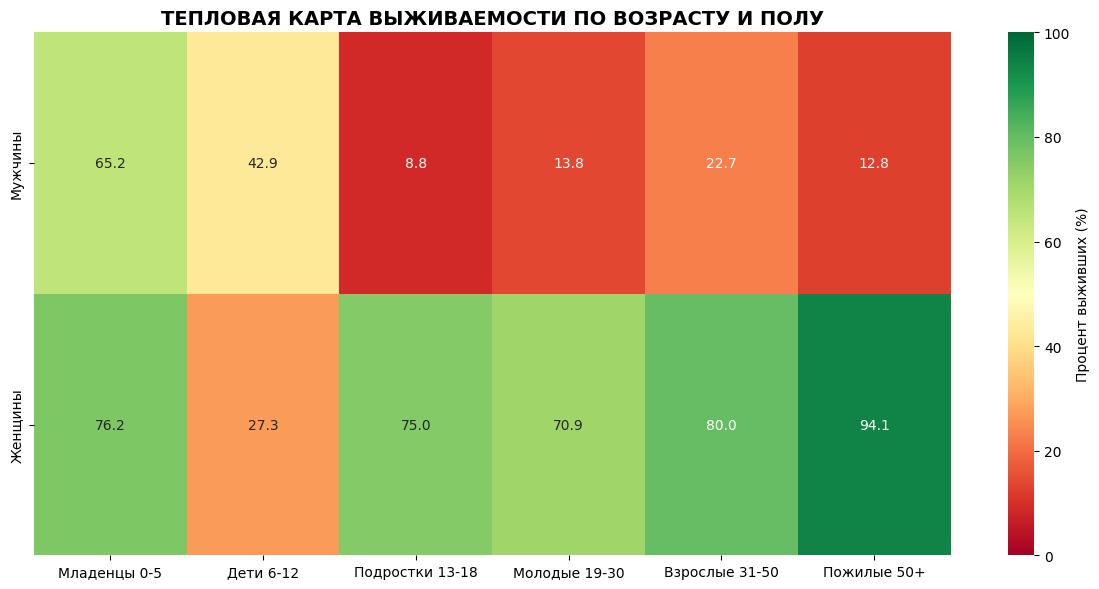

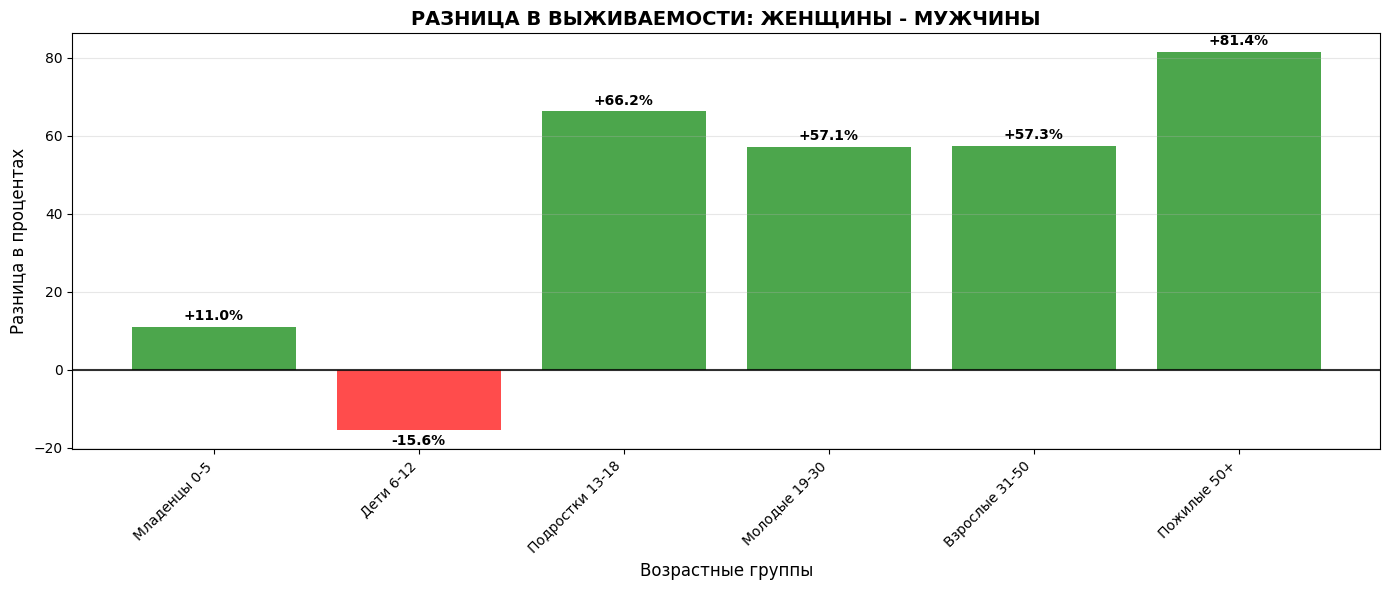

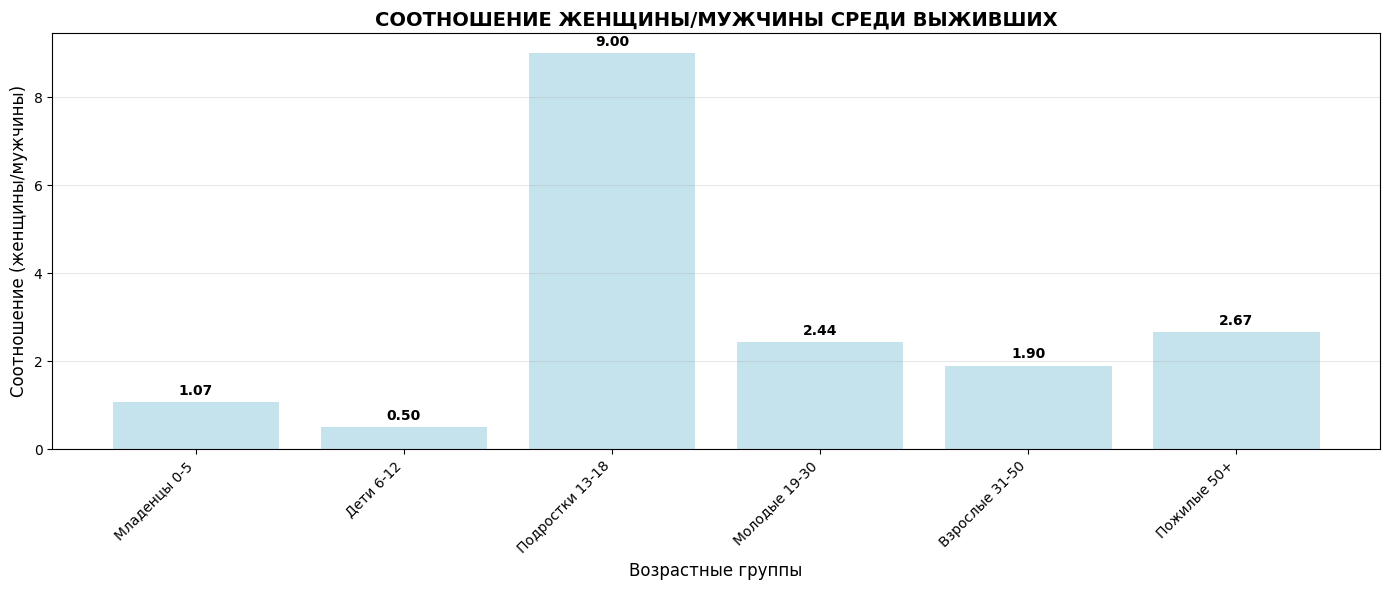

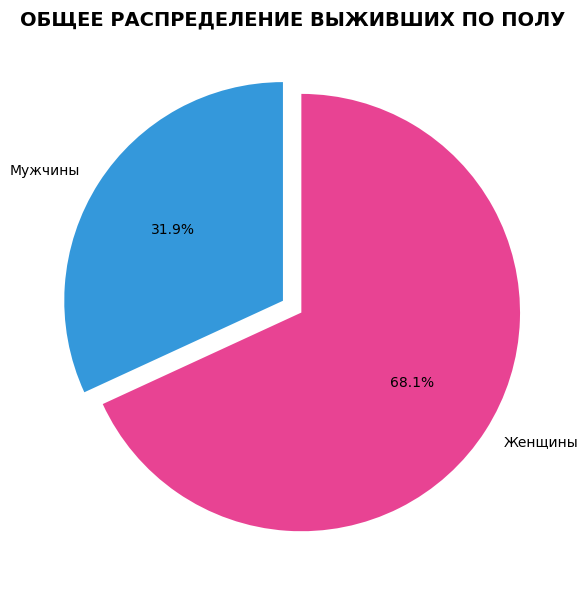


📊 ДЕТАЛЬНАЯ СТАТИСТИКА ПО ВОЗРАСТУ И ПОЛУ:
Возрастная группа    Пол      Выжило   Погибло  Всего    Выживаемость
------------------------------------------------------------------------------------------
Младенцы 0-5         М        15       8        23       65.2       %
                     Ж        16       5        21       76.2       %
------------------------------------------------------------------------------------------
Дети 6-12            М        6        8        14       42.9       %
                     Ж        3        8        11       27.3       %
------------------------------------------------------------------------------------------
Подростки 13-18      М        3        31       34       8.8        %
                     Ж        27       9        36       75.0       %
------------------------------------------------------------------------------------------
Молодые 19-30        М        39       244      283      13.8       %
                     Ж        95

In [18]:
# Детальное распределение по возрасту и полу выживших и не выживших
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

print("РАСШИРЕННЫЙ АНАЛИЗ ВЫЖИВАЕМОСТИ ПО ВОЗРАСТУ И ПОЛУ")
print("=" * 100)

age_bins = [0, 5, 12, 18, 30, 50, 100]
age_labels = ['Младенцы 0-5', 'Дети 6-12', 'Подростки 13-18', 'Молодые 19-30', 'Взрослые 31-50', 'Пожилые 50+']

# Создаем структуры для хранения данных
age_sex_data = {}

for group in age_labels:
    age_sex_data[group] = {
        'men_survived': 0, 'women_survived': 0,
        'men_not_survived': 0, 'women_not_survived': 0
    }

# Заполняем данные
for idx, row in survived.iterrows():
    if pd.notna(row['Age']):
        age_group = pd.cut([row['Age']], bins=age_bins, labels=age_labels)[0]
        if pd.notna(age_group):
            if row['Sex'] == 'male':
                age_sex_data[age_group]['men_survived'] += 1
            else:
                age_sex_data[age_group]['women_survived'] += 1

for idx, row in not_survived.iterrows():
    if pd.notna(row['Age']):
        age_group = pd.cut([row['Age']], bins=age_bins, labels=age_labels)[0]
        if pd.notna(age_group):
            if row['Sex'] == 'male':
                age_sex_data[age_group]['men_not_survived'] += 1
            else:
                age_sex_data[age_group]['women_not_survived'] += 1

# Подготовка данных для графиков
men_survived = [age_sex_data[group]['men_survived'] for group in age_labels]
women_survived = [age_sex_data[group]['women_survived'] for group in age_labels]
men_not_survived = [age_sex_data[group]['men_not_survived'] for group in age_labels]
women_not_survived = [age_sex_data[group]['women_not_survived'] for group in age_labels]

men_survival_rates = []
women_survival_rates = []

for group in age_labels:
    data = age_sex_data[group]
    men_total = data['men_survived'] + data['men_not_survived']
    women_total = data['women_survived'] + data['women_not_survived']
    men_rate = data['men_survived'] / men_total * 100 if men_total > 0 else 0
    women_rate = data['women_survived'] / women_total * 100 if women_total > 0 else 0
    men_survival_rates.append(men_rate)
    women_survival_rates.append(women_rate)

x = np.arange(len(age_labels))
width = 0.35

# ГРАФИК 1: Общее распределение выживших по возрасту и полу
plt.figure(figsize=(14, 6))
bars1 = plt.bar(x - width/2, men_survived, width, label='Мужчины выжили', color='#3498db', alpha=0.8)
bars2 = plt.bar(x + width/2, women_survived, width, label='Женщины выжили', color='#e84393', alpha=0.8)
plt.title('ВЫЖИВШИЕ: РАСПРЕДЕЛЕНИЕ ПО ВОЗРАСТУ И ПОЛУ', fontsize=14, fontweight='bold')
plt.xlabel('Возрастные группы', fontsize=12)
plt.ylabel('Количество выживших', fontsize=12)
plt.xticks(x, age_labels, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Добавляем числа на столбцы
for i, (men, women) in enumerate(zip(men_survived, women_survived)):
    plt.text(i - width/2, men + 0.5, f'{men}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.text(i + width/2, women + 0.5, f'{women}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# ГРАФИК 2: Общее распределение погибших по возрасту и полу
plt.figure(figsize=(14, 6))
bars1 = plt.bar(x - width/2, men_not_survived, width, label='Мужчины погибли', color='#2980b9', alpha=0.8)
bars2 = plt.bar(x + width/2, women_not_survived, width, label='Женщины погибли', color='#fd79a8', alpha=0.8)
plt.title('ПОГИБШИЕ: РАСПРЕДЕЛЕНИЕ ПО ВОЗРАСТУ И ПОЛУ', fontsize=14, fontweight='bold')
plt.xlabel('Возрастные группы', fontsize=12)
plt.ylabel('Количество погибших', fontsize=12)
plt.xticks(x, age_labels, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Добавляем числа на столбцы
for i, (men, women) in enumerate(zip(men_not_survived, women_not_survived)):
    plt.text(i - width/2, men + 0.5, f'{men}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.text(i + width/2, women + 0.5, f'{women}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# ГРАФИК 3: Процент выживших по возрасту и полу
plt.figure(figsize=(14, 6))
bars1 = plt.bar(x - width/2, men_survival_rates, width, label='Мужчины', color='#3498db', alpha=0.8)
bars2 = plt.bar(x + width/2, women_survival_rates, width, label='Женщины', color='#e84393', alpha=0.8)
plt.title('ПРОЦЕНТ ВЫЖИВШИХ ПО ВОЗРАСТУ И ПОЛУ', fontsize=14, fontweight='bold')
plt.xlabel('Возрастные группы', fontsize=12)
plt.ylabel('Процент выживших (%)', fontsize=12)
plt.xticks(x, age_labels, rotation=45, ha='right')
plt.ylim(0, 100)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Добавляем проценты на столбцы
for i, (men_rate, women_rate) in enumerate(zip(men_survival_rates, women_survival_rates)):
    plt.text(i - width/2, men_rate + 2, f'{men_rate:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.text(i + width/2, women_rate + 2, f'{women_rate:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# ГРАФИК 4: Stacked bar - мужчины (выжившие vs погибшие)
plt.figure(figsize=(14, 6))
bars1 = plt.bar(age_labels, men_survived, label='Мужчины выжили', color='#2ecc71', alpha=0.8)
bars2 = plt.bar(age_labels, men_not_survived, bottom=men_survived, label='Мужчины погибли', color='#e74c3c', alpha=0.8)
plt.title('МУЖЧИНЫ: ВЫЖИВАЕМОСТЬ ПО ВОЗРАСТНЫМ ГРУППАМ', fontsize=14, fontweight='bold')
plt.xlabel('Возрастные группы', fontsize=12)
plt.ylabel('Количество мужчин', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Добавляем общие числа
for i, (surv, not_surv) in enumerate(zip(men_survived, men_not_survived)):
    total = surv + not_surv
    plt.text(i, total + 1, f'Всего: {total}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# ГРАФИК 5: Stacked bar - женщины (выжившие vs погибшие)
plt.figure(figsize=(14, 6))
bars1 = plt.bar(age_labels, women_survived, label='Женщины выжили', color='#2ecc71', alpha=0.8)
bars2 = plt.bar(age_labels, women_not_survived, bottom=women_survived, label='Женщины погибли', color='#e74c3c', alpha=0.8)
plt.title('ЖЕНЩИНЫ: ВЫЖИВАЕМОСТЬ ПО ВОЗРАСТНЫМ ГРУППАМ', fontsize=14, fontweight='bold')
plt.xlabel('Возрастные группы', fontsize=12)
plt.ylabel('Количество женщин', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Добавляем общие числа
for i, (surv, not_surv) in enumerate(zip(women_survived, women_not_survived)):
    total = surv + not_surv
    plt.text(i, total + 1, f'Всего: {total}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# ГРАФИК 6: Линейный график выживаемости по возрастам
plt.figure(figsize=(14, 6))
plt.plot(age_labels, men_survival_rates, marker='o', linewidth=3, markersize=8, label='Мужчины', color='#3498db')
plt.plot(age_labels, women_survival_rates, marker='s', linewidth=3, markersize=8, label='Женщины', color='#e84393')
plt.title('ДИНАМИКА ВЫЖИВАЕМОСТИ ПО ВОЗРАСТНЫМ ГРУППАМ', fontsize=14, fontweight='bold')
plt.xlabel('Возрастные группы', fontsize=12)
plt.ylabel('Процент выживших (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.legend()
plt.grid(True, alpha=0.3)

# Добавляем значения на точки
for i, (men_rate, women_rate) in enumerate(zip(men_survival_rates, women_survival_rates)):
    plt.text(i, men_rate + 3, f'{men_rate:.1f}%', ha='center', va='bottom', fontweight='bold', color='#3498db')
    plt.text(i, women_rate - 4, f'{women_rate:.1f}%', ha='center', va='top', fontweight='bold', color='#e84393')

plt.tight_layout()
plt.show()

# ГРАФИК 7: Heatmap выживаемости
plt.figure(figsize=(12, 6))
heatmap_data = pd.DataFrame({
    'Мужчины': men_survival_rates,
    'Женщины': women_survival_rates
}, index=age_labels)

sns.heatmap(heatmap_data.T, annot=True, fmt='.1f', cmap='RdYlGn', vmin=0, vmax=100, 
            cbar_kws={'label': 'Процент выживших (%)'})
plt.title('ТЕПЛОВАЯ КАРТА ВЫЖИВАЕМОСТИ ПО ВОЗРАСТУ И ПОЛУ', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ГРАФИК 8: Разница в выживаемости между полами
plt.figure(figsize=(14, 6))
difference = [women - men for men, women in zip(men_survival_rates, women_survival_rates)]
colors = ['green' if diff > 0 else 'red' for diff in difference]
bars = plt.bar(age_labels, difference, color=colors, alpha=0.7)
plt.title('РАЗНИЦА В ВЫЖИВАЕМОСТИ: ЖЕНЩИНЫ - МУЖЧИНЫ', fontsize=14, fontweight='bold')
plt.xlabel('Возрастные группы', fontsize=12)
plt.ylabel('Разница в процентах', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Добавляем значения
for i, diff in enumerate(difference):
    plt.text(i, diff + (1 if diff > 0 else -1), f'{diff:+.1f}%', 
             ha='center', va='bottom' if diff > 0 else 'top', fontweight='bold', fontsize=10)

plt.axhline(y=0, color='black', linestyle='-', alpha=0.8)
plt.tight_layout()
plt.show()

# ГРАФИК 9: Соотношение полов по возрастным группам (выжившие)
plt.figure(figsize=(14, 6))
ratios_survived = [women/men if men > 0 else 0 for men, women in zip(men_survived, women_survived)]
plt.bar(age_labels, ratios_survived, color='lightblue', alpha=0.7)
plt.title('СООТНОШЕНИЕ ЖЕНЩИНЫ/МУЖЧИНЫ СРЕДИ ВЫЖИВШИХ', fontsize=14, fontweight='bold')
plt.xlabel('Возрастные группы', fontsize=12)
plt.ylabel('Соотношение (женщины/мужчины)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for i, ratio in enumerate(ratios_survived):
    plt.text(i, ratio + 0.1, f'{ratio:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ГРАФИК 10: Круговая диаграмма - общее распределение выживших по полу
plt.figure(figsize=(14, 6))
total_men_survived = sum(men_survived)
total_women_survived = sum(women_survived)
plt.pie([total_men_survived, total_women_survived], 
        labels=['Мужчины', 'Женщины'], 
        autopct='%1.1f%%', 
        colors=['#3498db', '#e84393'],
        startangle=90,
        explode=(0.05, 0.05))
plt.title('ОБЩЕЕ РАСПРЕДЕЛЕНИЕ ВЫЖИВШИХ ПО ПОЛУ', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ВЫВОД СТАТИСТИКИ
print("\n📊 ДЕТАЛЬНАЯ СТАТИСТИКА ПО ВОЗРАСТУ И ПОЛУ:")
print("=" * 90)
print(f"{'Возрастная группа':<20} {'Пол':<8} {'Выжило':<8} {'Погибло':<8} {'Всего':<8} {'Выживаемость':<12}")
print("-" * 90)

for group in age_labels:
    data = age_sex_data[group]
    
    # Мужчины
    men_surv = data['men_survived']
    men_not_surv = data['men_not_survived']
    men_total = men_surv + men_not_surv
    men_rate = men_surv / men_total * 100 if men_total > 0 else 0
    
    # Женщины
    women_surv = data['women_survived']
    women_not_surv = data['women_not_survived']
    women_total = women_surv + women_not_surv
    women_rate = women_surv / women_total * 100 if women_total > 0 else 0
    
    print(f"{group:<20} {'М':<8} {men_surv:<8} {men_not_surv:<8} {men_total:<8} {men_rate:<11.1f}%")
    print(f"{'':<20} {'Ж':<8} {women_surv:<8} {women_not_surv:<8} {women_total:<8} {women_rate:<11.1f}%")
    print("-" * 90)

print("=" * 90)

# Гипотеза подтвердилась: Дети выживали чаще и расхождение по шансам до 12 лет били небольшие после 12 лет шансы и мужского поло резко полетели вниз а у женского пола вверх.

# **Гипотеза:**
# Семьям было проще выжить чем одиночкам

ВЛИЯНИЕ РАЗМЕРА СЕМЬИ НА ВЫЖИВАЕМОСТЬ:
Размер семьи 1: 163.0 из 537.0 выжило ( 30.4%)
Размер семьи 2: 89.0 из 161.0 выжило ( 55.3%)
Размер семьи 3: 59.0 из 102.0 выжило ( 57.8%)
Размер семьи 4: 21.0 из 29.0 выжило ( 72.4%)
Размер семьи 5: 3.0 из 15.0 выжило ( 20.0%)
Размер семьи 6: 3.0 из 22.0 выжило ( 13.6%)
Размер семьи 7: 4.0 из 12.0 выжило ( 33.3%)
Размер семьи 8: 0.0 из 6.0 выжило (  0.0%)
Размер семьи 11: 0.0 из 7.0 выжило (  0.0%)

ВЛИЯНИЕ ОДИНОЧЕСТВА НА ВЫЖИВАЕМОСТЬ:
С семьей:  50.6% выживаемость
Один:  30.4% выживаемость


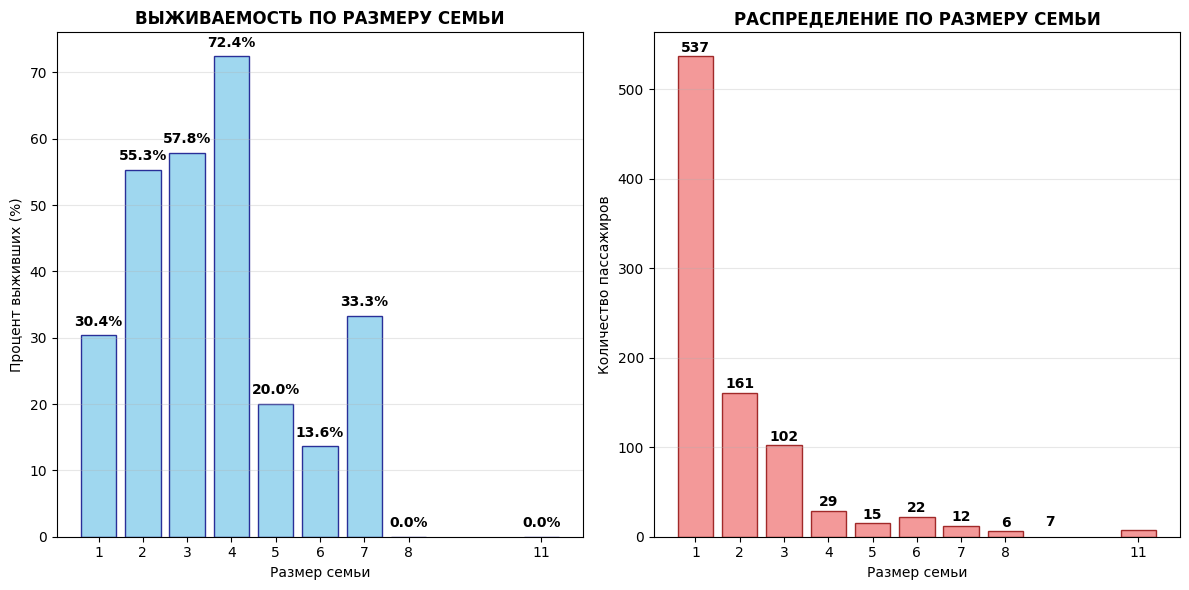

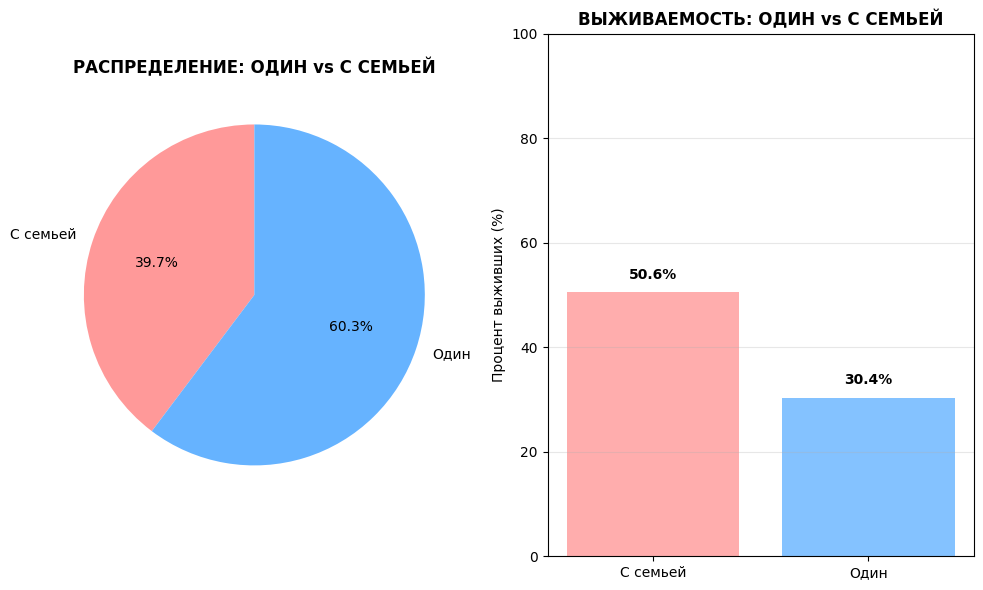

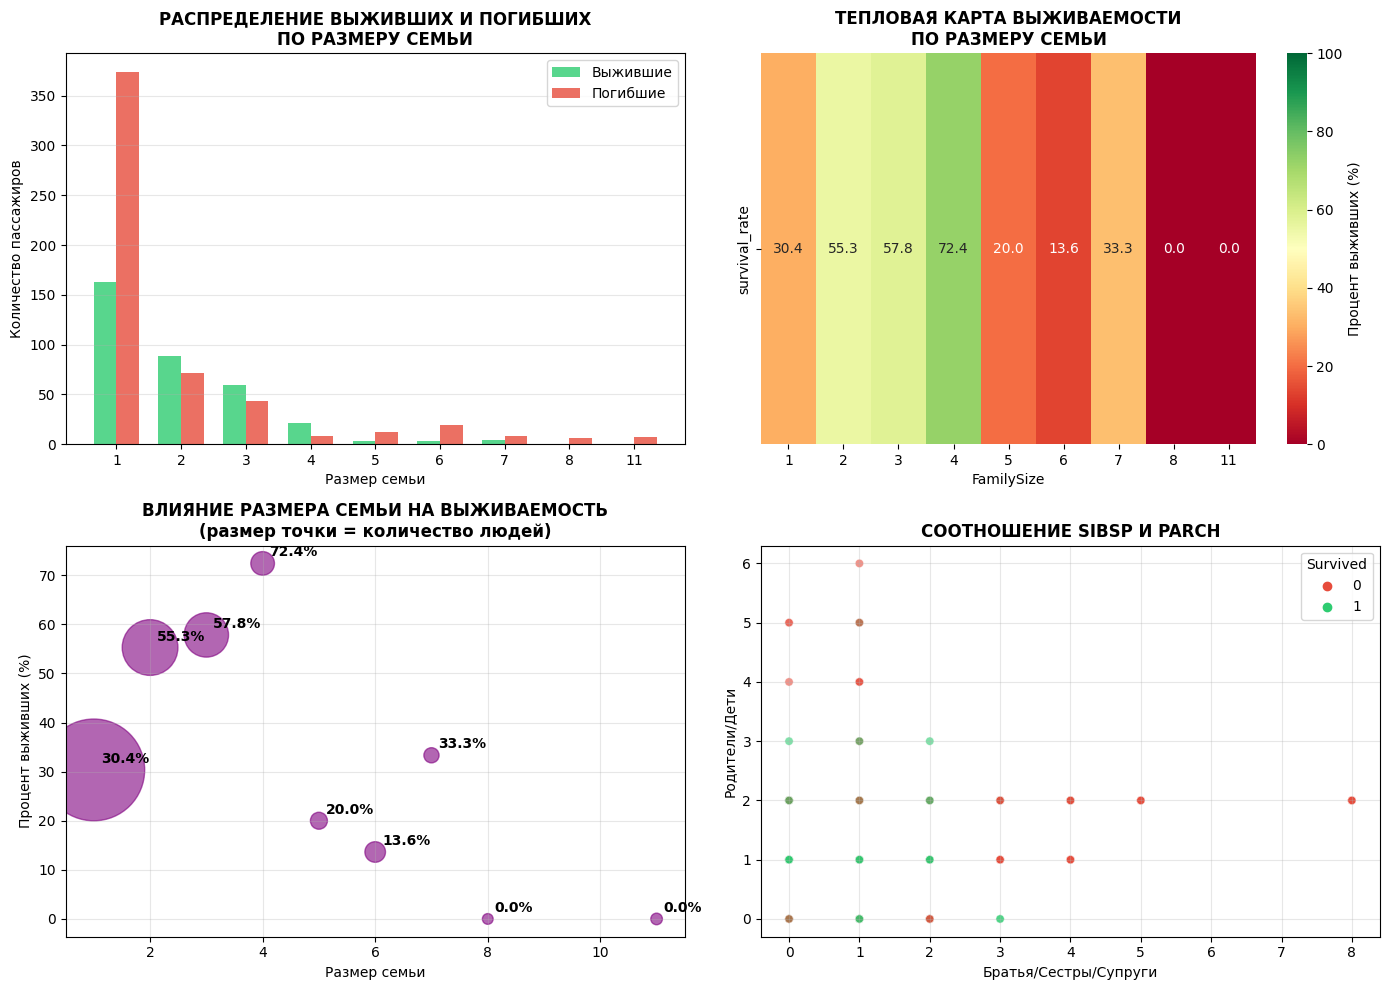

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


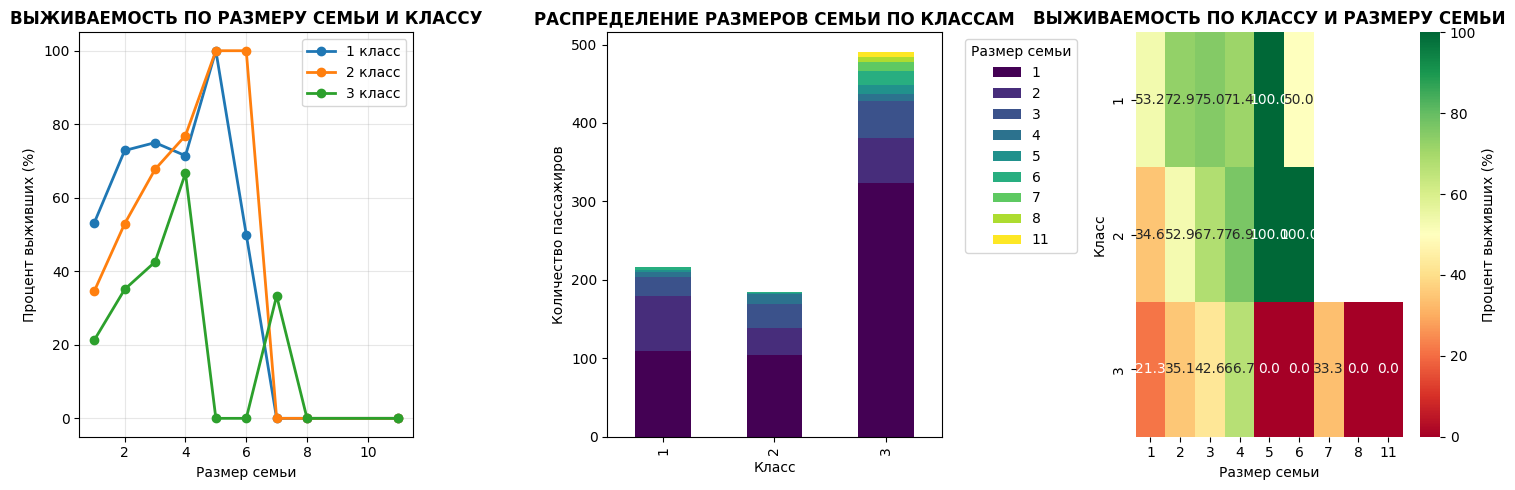


📊 ДЕТАЛЬНАЯ СТАТИСТИКА ПО СЕМЕЙНЫМ ПРИЗНАКАМ:
Размер семьи Всего    Выжило   Выживаемость % от общего 
--------------------------------------------------------------------------------
1            537.0    163.0    30.4       % 60.3       %
2            161.0    89.0     55.3       % 18.1       %
3            102.0    59.0     57.8       % 11.4       %
4            29.0     21.0     72.4       % 3.3        %
5            15.0     3.0      20.0       % 1.7        %
6            22.0     3.0      13.6       % 2.5        %
7            12.0     4.0      33.3       % 1.3        %
8            6.0      0.0      0.0        % 0.7        %
11           7.0      0.0      0.0        % 0.8        %
--------------------------------------------------------------------------------

🎯 КЛЮЧЕВЫЕ ВЫВОДЫ:
• Оптимальный размер семьи для выживания: 4 человек (72.4%)
• Наихудший размер семьи: 8 человек (0.0%)
• Одиночки выживали в 30.4% случаев
• Пассажиры с семьей выживали в 50.6% случаев
• Разница: 20.2%

In [19]:
# Создание семейных признаков
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

print("ВЛИЯНИЕ РАЗМЕРА СЕМЬИ НА ВЫЖИВАЕМОСТЬ:")
print("=" * 50)
family_survival = df.groupby('FamilySize')['Survived'].agg(['count', 'sum', 'mean'])
family_survival['survival_rate'] = family_survival['mean'] * 100
family_survival = family_survival.rename(columns={'count': 'total', 'sum': 'survived', 'mean': 'survival_prob'})

for size in sorted(family_survival.index):
    data = family_survival.loc[size]
    print(f"Размер семьи {size}: {data['survived']:>2} из {data['total']:>2} выжило ({data['survival_rate']:5.1f}%)")

print("\nВЛИЯНИЕ ОДИНОЧЕСТВА НА ВЫЖИВАЕМОСТЬ:")
print("=" * 45)
alone_survival = df.groupby('IsAlone')['Survived'].mean()
for alone in [0, 1]:
    status = "Один" if alone == 1 else "С семьей"
    print(f"{status}: {alone_survival[alone]*100:5.1f}% выживаемость")

# ВИЗУАЛИЗАЦИЯ 1: Выживаемость по размеру семьи
plt.figure(figsize=(12, 6))
sizes = family_survival.index
rates = family_survival['survival_rate']
totals = family_survival['total']

plt.subplot(1, 2, 1)
bars = plt.bar(sizes, rates, color='skyblue', alpha=0.8, edgecolor='navy')
plt.title('ВЫЖИВАЕМОСТЬ ПО РАЗМЕРУ СЕМЬИ', fontweight='bold')
plt.xlabel('Размер семьи')
plt.ylabel('Процент выживших (%)')
plt.xticks(sizes)
plt.grid(axis='y', alpha=0.3)

# Добавляем проценты на столбцы
for bar, rate in zip(bars, rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

# Добавляем общее количество
plt.subplot(1, 2, 2)
plt.bar(sizes, totals, color='lightcoral', alpha=0.8, edgecolor='darkred')
plt.title('РАСПРЕДЕЛЕНИЕ ПО РАЗМЕРУ СЕМЬИ', fontweight='bold')
plt.xlabel('Размер семьи')
plt.ylabel('Количество пассажиров')
plt.xticks(sizes)
plt.grid(axis='y', alpha=0.3)

# Добавляем числа на столбцы
for i, total in enumerate(totals):
    plt.text(i + 1, total + 2, f'{total}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ВИЗУАЛИЗАЦИЯ 2: Выживаемость одиноких vs с семьей
plt.figure(figsize=(10, 6))
alone_data = df.groupby('IsAlone')['Survived'].agg(['count', 'sum', 'mean'])
alone_data['survival_rate'] = alone_data['mean'] * 100

labels = ['С семьей', 'Один']
rates = [alone_data.loc[0, 'survival_rate'], alone_data.loc[1, 'survival_rate']]
totals = [alone_data.loc[0, 'count'], alone_data.loc[1, 'count']]

plt.subplot(1, 2, 1)
colors = ['#ff9999', '#66b3ff']
plt.pie(totals, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('РАСПРЕДЕЛЕНИЕ: ОДИН vs С СЕМЬЕЙ', fontweight='bold')

plt.subplot(1, 2, 2)
bars = plt.bar(labels, rates, color=colors, alpha=0.8)
plt.title('ВЫЖИВАЕМОСТЬ: ОДИН vs С СЕМЬЕЙ', fontweight='bold')
plt.ylabel('Процент выживших (%)')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

for bar, rate in zip(bars, rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ВИЗУАЛИЗАЦИЯ 3: Детальный анализ по размеру семьи
plt.figure(figsize=(14, 10))

# График 1: Распределение выживших и погибших по размеру семьи
plt.subplot(2, 2, 1)
survived_by_size = df[df['Survived'] == 1]['FamilySize'].value_counts().sort_index()
died_by_size = df[df['Survived'] == 0]['FamilySize'].value_counts().sort_index()

x = np.arange(len(sizes))
width = 0.35

plt.bar(x - width/2, [survived_by_size.get(size, 0) for size in sizes], 
        width, label='Выжившие', color='#2ecc71', alpha=0.8)
plt.bar(x + width/2, [died_by_size.get(size, 0) for size in sizes], 
        width, label='Погибшие', color='#e74c3c', alpha=0.8)

plt.title('РАСПРЕДЕЛЕНИЕ ВЫЖИВШИХ И ПОГИБШИХ\nПО РАЗМЕРУ СЕМЬИ', fontweight='bold')
plt.xlabel('Размер семьи')
plt.ylabel('Количество пассажиров')
plt.xticks(x, sizes)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# График 2: Heatmap выживаемости по размеру семьи
plt.subplot(2, 2, 2)
heatmap_data = family_survival[['survival_rate']].T
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn', 
            vmin=0, vmax=100, cbar_kws={'label': 'Процент выживших (%)'})
plt.title('ТЕПЛОВАЯ КАРТА ВЫЖИВАЕМОСТИ\nПО РАЗМЕРУ СЕМЬИ', fontweight='bold')

# График 3: Влияние размера семьи на выживаемость (точечный график)
plt.subplot(2, 2, 3)
plt.scatter(family_survival.index, family_survival['survival_rate'], 
           s=family_survival['total']*10, alpha=0.6, color='purple')
plt.title('ВЛИЯНИЕ РАЗМЕРА СЕМЬИ НА ВЫЖИВАЕМОСТЬ\n(размер точки = количество людей)', fontweight='bold')
plt.xlabel('Размер семьи')
plt.ylabel('Процент выживших (%)')
plt.grid(True, alpha=0.3)

# Добавляем аннотации
for size in family_survival.index:
    rate = family_survival.loc[size, 'survival_rate']
    total = family_survival.loc[size, 'total']
    plt.annotate(f'{rate:.1f}%', (size, rate), 
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

# График 4: Соотношение SibSp и Parch
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='SibSp', y='Parch', hue='Survived', 
               palette={0: '#e74c3c', 1: '#2ecc71'}, alpha=0.6)
plt.title('СООТНОШЕНИЕ SIBSP И PARCH', fontweight='bold')
plt.xlabel('Братья/Сестры/Супруги')
plt.ylabel('Родители/Дети')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ВИЗУАЛИЗАЦИЯ 4: Анализ в разрезе класса
plt.figure(figsize=(15, 5))

# Выживаемость по размеру семьи и классу
plt.subplot(1, 3, 1)
for pclass in [1, 2, 3]:
    class_data = df[df['Pclass'] == pclass]
    survival_by_size = class_data.groupby('FamilySize')['Survived'].mean() * 100
    plt.plot(sizes, [survival_by_size.get(size, 0) for size in sizes], 
             marker='o', label=f'{pclass} класс', linewidth=2)

plt.title('ВЫЖИВАЕМОСТЬ ПО РАЗМЕРУ СЕМЬИ И КЛАССУ', fontweight='bold')
plt.xlabel('Размер семьи')
plt.ylabel('Процент выживших (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Распределение размеров семьи по классам
plt.subplot(1, 3, 2)
family_by_class = df.groupby(['Pclass', 'FamilySize']).size().unstack(fill_value=0)
family_by_class.plot(kind='bar', stacked=True, ax=plt.gca(), 
                    color=plt.cm.viridis(np.linspace(0, 1, len(family_by_class.columns))))
plt.title('РАСПРЕДЕЛЕНИЕ РАЗМЕРОВ СЕМЬИ ПО КЛАССАМ', fontweight='bold')
plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')
plt.legend(title='Размер семьи', bbox_to_anchor=(1.05, 1), loc='upper left')

# Heatmap выживаемости по классу и размеру семьи
plt.subplot(1, 3, 3)
heatmap_data = df.pivot_table(values='Survived', index='Pclass', 
                             columns='FamilySize', aggfunc='mean') * 100
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn', 
            vmin=0, vmax=100, cbar_kws={'label': 'Процент выживших (%)'})
plt.title('ВЫЖИВАЕМОСТЬ ПО КЛАССУ И РАЗМЕРУ СЕМЬИ', fontweight='bold')
plt.xlabel('Размер семьи')
plt.ylabel('Класс')

plt.tight_layout()
plt.show()

# ДЕТАЛЬНАЯ СТАТИСТИКА
print("\n📊 ДЕТАЛЬНАЯ СТАТИСТИКА ПО СЕМЕЙНЫМ ПРИЗНАКАМ:")
print("=" * 80)
print(f"{'Размер семьи':<12} {'Всего':<8} {'Выжило':<8} {'Выживаемость':<12} {'% от общего':<12}")
print("-" * 80)

total_passengers = len(df)
for size in sorted(family_survival.index):
    data = family_survival.loc[size]
    percent_of_total = (data['total'] / total_passengers) * 100
    print(f"{size:<12} {data['total']:<8} {data['survived']:<8} {data['survival_rate']:<11.1f}% {percent_of_total:<11.1f}%")

print("-" * 80)

# Анализ оптимального размера семьи
optimal_size = family_survival['survival_rate'].idxmax()
worst_size = family_survival['survival_rate'].idxmin()

print(f"\n🎯 КЛЮЧЕВЫЕ ВЫВОДЫ:")
print(f"• Оптимальный размер семьи для выживания: {optimal_size} человек ({family_survival.loc[optimal_size, 'survival_rate']:.1f}%)")
print(f"• Наихудший размер семьи: {worst_size} человек ({family_survival.loc[worst_size, 'survival_rate']:.1f}%)")
print(f"• Одиночки выживали в {alone_survival[1]*100:.1f}% случаев")
print(f"• Пассажиры с семьей выживали в {alone_survival[0]*100:.1f}% случаев")
print(f"• Разница: {abs(alone_survival[1] - alone_survival[0])*100:.1f}%")

# Дополнительный анализ: средний размер семьи по классам
print(f"\n📈 СРЕДНИЙ РАЗМЕР СЕМЬИ ПО КЛАССАМ:")
for pclass in [1, 2, 3]:
    avg_family_size = df[df['Pclass'] == pclass]['FamilySize'].mean()
    print(f"  {pclass} класс: {avg_family_size:.2f} человека")

# Гипотеза подтвердилась: Шанс выжить было больше если ты с семьёй чем одному, идеальный размер для выживаемости нужно 4 человека в семье.

# **Гипотеза:**
# Выживаемость зависит от порта посадки

ВЫЖИВАЕМОСТЬ ПО ПОРТУ ПОСАДКИ:
Шербур (C): 93.0 из 168.0 выжило ( 55.4%)
Квинстаун (Q): 30.0 из 77.0 выжило ( 39.0%)
Саутгемптон (S): 219.0 из 646.0 выжило ( 33.9%)


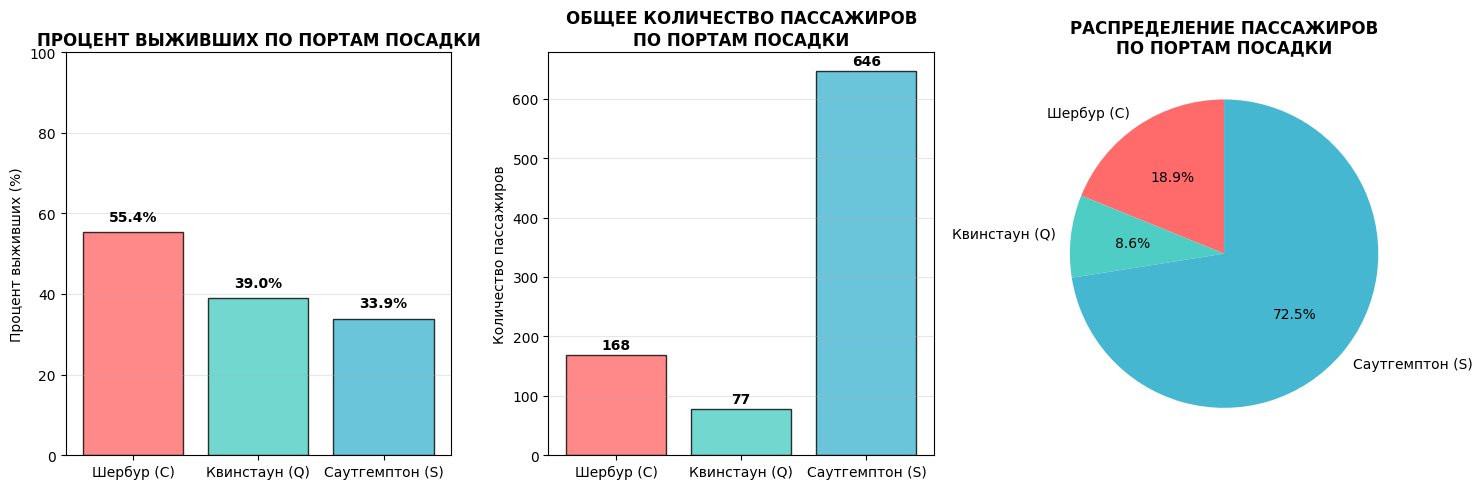

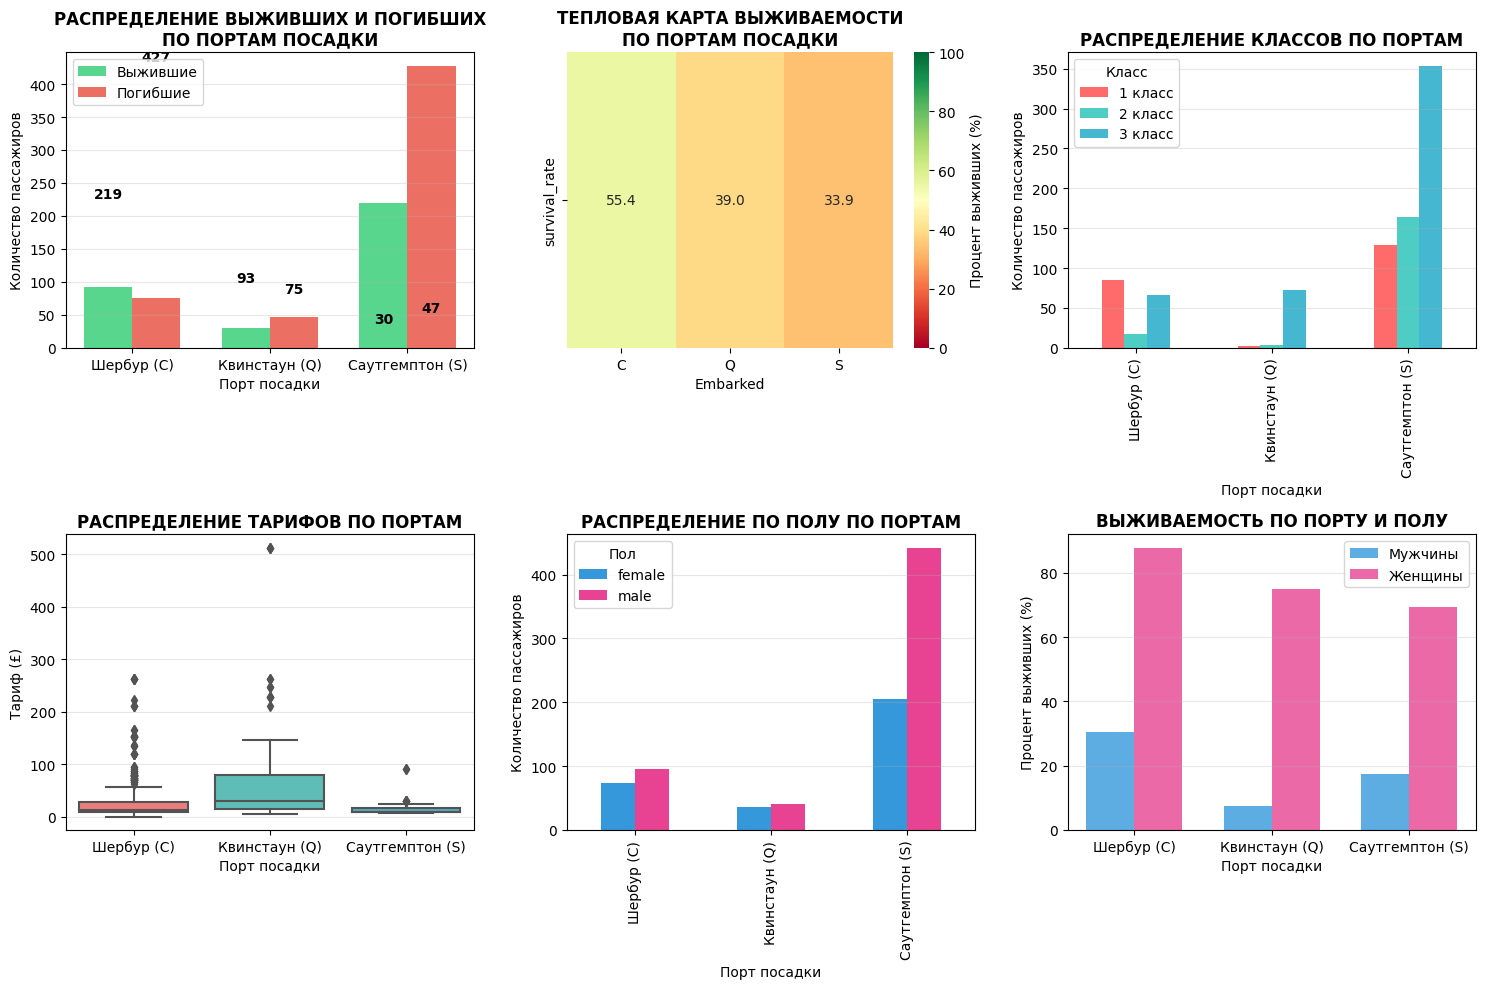

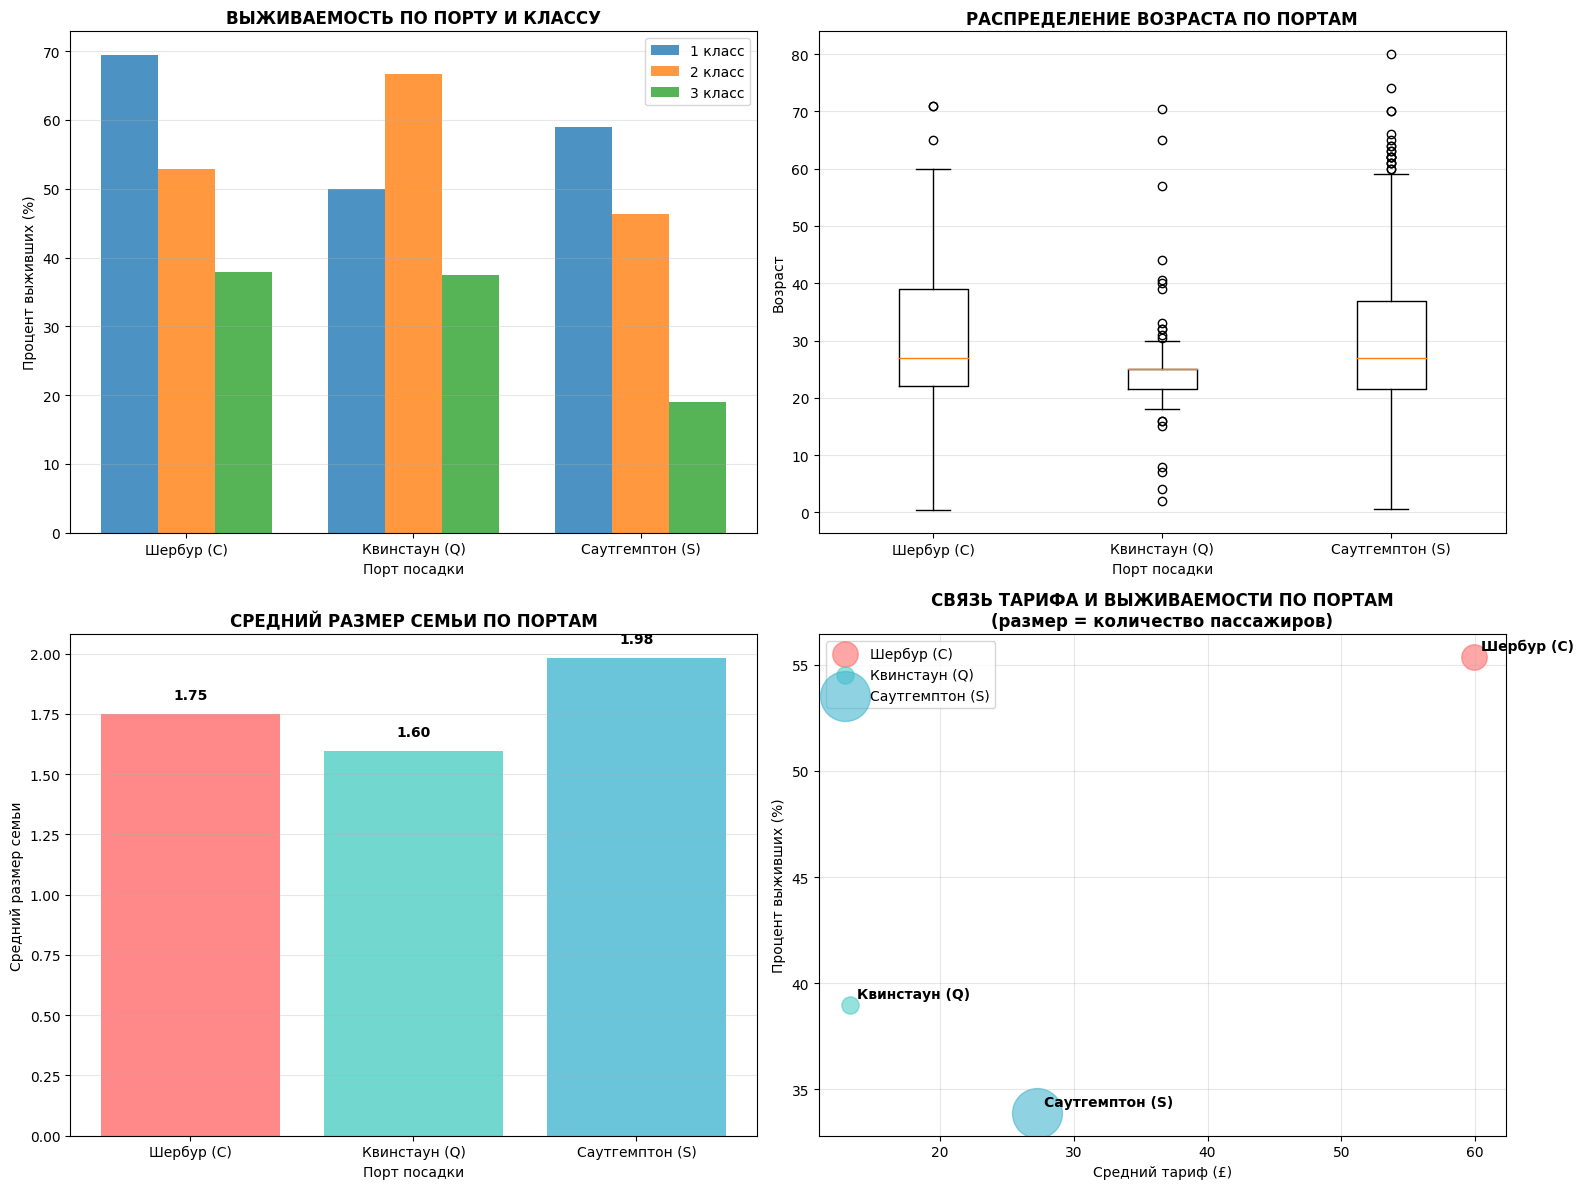


📊 ДЕТАЛЬНАЯ СТАТИСТИКА ПО ПОРТАМ ПОСАДКИ:
Порт            Всего    Выжило   Выживаемость % от общего  Ср. тариф 
--------------------------------------------------------------------------------
Шербур (C)      168.0    93.0     55.4       % 18.9       % 59.95    £
Квинстаун (Q)   77.0     30.0     39.0       % 8.6        % 13.28    £
Саутгемптон (S) 646.0    219.0    33.9       % 72.5       % 27.24    £
--------------------------------------------------------------------------------

🎯 КЛЮЧЕВЫЕ ВЫВОДЫ:
• Лучшая выживаемость: Шербур (C) (55.4%)
• Худшая выживаемость: Саутгемптон (S) (33.9%)
• Разница: 21.5%

📈 ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:
  Шербур (C): средний возраст 30.2 лет, 1 класс: 50.6%, женщины: 43.5%
  Квинстаун (Q): средний возраст 25.1 лет, 1 класс: 2.6%, женщины: 46.8%
  Саутгемптон (S): средний возраст 29.3 лет, 1 класс: 20.0%, женщины: 31.7%


In [20]:
print("ВЫЖИВАЕМОСТЬ ПО ПОРТУ ПОСАДКИ:")
print("=" * 50)
embarked_survival = df.groupby('Embarked')['Survived'].agg(['count', 'sum', 'mean'])
embarked_survival['survival_rate'] = embarked_survival['mean'] * 100
embarked_survival = embarked_survival.rename(columns={'count': 'total', 'sum': 'survived', 'mean': 'survival_prob'})

# Расшифровка портов
port_names = {'C': 'Шербур (C)', 'Q': 'Квинстаун (Q)', 'S': 'Саутгемптон (S)'}

for port in embarked_survival.index:
    data = embarked_survival.loc[port]
    port_name = port_names.get(port, port)
    print(f"{port_name}: {data['survived']:>3} из {data['total']:>3} выжило ({data['survival_rate']:5.1f}%)")

# ВИЗУАЛИЗАЦИЯ 1: Основные графики выживаемости по портам
plt.figure(figsize=(15, 5))

# График 1: Процент выживших по портам
plt.subplot(1, 3, 1)
ports = [port_names.get(p, p) for p in embarked_survival.index]
rates = embarked_survival['survival_rate']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

bars = plt.bar(ports, rates, color=colors, alpha=0.8, edgecolor='black')
plt.title('ПРОЦЕНТ ВЫЖИВШИХ ПО ПОРТАМ ПОСАДКИ', fontweight='bold', fontsize=12)
plt.ylabel('Процент выживших (%)')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

# Добавляем проценты на столбцы
for bar, rate in zip(bars, rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

# График 2: Общее количество пассажиров по портам
plt.subplot(1, 3, 2)
totals = embarked_survival['total']
bars = plt.bar(ports, totals, color=colors, alpha=0.8, edgecolor='black')
plt.title('ОБЩЕЕ КОЛИЧЕСТВО ПАССАЖИРОВ\nПО ПОРТАМ ПОСАДКИ', fontweight='bold', fontsize=12)
plt.ylabel('Количество пассажиров')
plt.grid(axis='y', alpha=0.3)

# Добавляем числа на столбцы
for bar, total in zip(bars, totals):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{total}', ha='center', va='bottom', fontweight='bold')

# График 3: Круговая диаграмма распределения
plt.subplot(1, 3, 3)
plt.pie(totals, labels=ports, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('РАСПРЕДЕЛЕНИЕ ПАССАЖИРОВ\nПО ПОРТАМ ПОСАДКИ', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# ВИЗУАЛИЗАЦИЯ 2: Детальный анализ по портам
plt.figure(figsize=(15, 10))

# График 1: Распределение выживших и погибших
plt.subplot(2, 3, 1)
survived_by_port = df[df['Survived'] == 1]['Embarked'].value_counts()
died_by_port = df[df['Survived'] == 0]['Embarked'].value_counts()

x = np.arange(len(ports))
width = 0.35

bars1 = plt.bar(x - width/2, [survived_by_port.get(port, 0) for port in embarked_survival.index], 
                width, label='Выжившие', color='#2ecc71', alpha=0.8)
bars2 = plt.bar(x + width/2, [died_by_port.get(port, 0) for port in embarked_survival.index], 
                width, label='Погибшие', color='#e74c3c', alpha=0.8)

plt.title('РАСПРЕДЕЛЕНИЕ ВЫЖИВШИХ И ПОГИБШИХ\nПО ПОРТАМ ПОСАДКИ', fontweight='bold')
plt.xlabel('Порт посадки')
plt.ylabel('Количество пассажиров')
plt.xticks(x, ports)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Добавляем числа на столбцы
for i, (surv, died) in enumerate(zip(survived_by_port, died_by_port)):
    plt.text(i - width/2, surv + 3, f'{surv}', ha='center', va='bottom', fontweight='bold')
    plt.text(i + width/2, died + 3, f'{died}', ha='center', va='bottom', fontweight='bold')

# График 2: Heatmap выживаемости
plt.subplot(2, 3, 2)
heatmap_data = embarked_survival[['survival_rate']].T
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn', 
            vmin=0, vmax=100, cbar_kws={'label': 'Процент выживших (%)'})
plt.title('ТЕПЛОВАЯ КАРТА ВЫЖИВАЕМОСТИ\nПО ПОРТАМ ПОСАДКИ', fontweight='bold')

# График 3: Связь порта с классом обслуживания
plt.subplot(2, 3, 3)
class_by_port = df.groupby(['Embarked', 'Pclass']).size().unstack(fill_value=0)
class_by_port.index = [port_names.get(p, p) for p in class_by_port.index]
class_by_port.plot(kind='bar', ax=plt.gca(), color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('РАСПРЕДЕЛЕНИЕ КЛАССОВ ПО ПОРТАМ', fontweight='bold')
plt.xlabel('Порт посадки')
plt.ylabel('Количество пассажиров')
plt.legend(title='Класс', labels=['1 класс', '2 класс', '3 класс'])
plt.grid(axis='y', alpha=0.3)

# График 4: Связь порта с тарифом
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Embarked', y='Fare', palette=colors)
plt.title('РАСПРЕДЕЛЕНИЕ ТАРИФОВ ПО ПОРТАМ', fontweight='bold')
plt.xlabel('Порт посадки')
plt.ylabel('Тариф (£)')
plt.xticks(range(len(ports)), ports)
plt.grid(axis='y', alpha=0.3)

# График 5: Связь порта с полом
plt.subplot(2, 3, 5)
sex_by_port = df.groupby(['Embarked', 'Sex']).size().unstack(fill_value=0)
sex_by_port.index = [port_names.get(p, p) for p in sex_by_port.index]
sex_by_port.plot(kind='bar', ax=plt.gca(), color=['#3498db', '#e84393'])
plt.title('РАСПРЕДЕЛЕНИЕ ПО ПОЛУ ПО ПОРТАМ', fontweight='bold')
plt.xlabel('Порт посадки')
plt.ylabel('Количество пассажиров')
plt.legend(title='Пол')
plt.grid(axis='y', alpha=0.3)

# График 6: Выживаемость по порту и полу
plt.subplot(2, 3, 6)
survival_by_port_sex = df.groupby(['Embarked', 'Sex'])['Survived'].mean().unstack(fill_value=0) * 100
survival_by_port_sex.index = [port_names.get(p, p) for p in survival_by_port_sex.index]

x = np.arange(len(ports))
width = 0.35

bars1 = plt.bar(x - width/2, survival_by_port_sex['male'], width, label='Мужчины', color='#3498db', alpha=0.8)
bars2 = plt.bar(x + width/2, survival_by_port_sex['female'], width, label='Женщины', color='#e84393', alpha=0.8)

plt.title('ВЫЖИВАЕМОСТЬ ПО ПОРТУ И ПОЛУ', fontweight='bold')
plt.xlabel('Порт посадки')
plt.ylabel('Процент выживших (%)')
plt.xticks(x, ports)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ВИЗУАЛИЗАЦИЯ 3: Анализ в разрезе нескольких факторов
plt.figure(figsize=(16, 12))

# График 1: Выживаемость по порту и классу
plt.subplot(2, 2, 1)
survival_by_port_class = df.groupby(['Embarked', 'Pclass'])['Survived'].mean().unstack(fill_value=0) * 100
survival_by_port_class.index = [port_names.get(p, p) for p in survival_by_port_class.index]

x = np.arange(len(ports))
width = 0.25

for i, pclass in enumerate([1, 2, 3]):
    offset = width * (i - 1)
    plt.bar(x + offset, survival_by_port_class[pclass], width, 
            label=f'{pclass} класс', alpha=0.8)

plt.title('ВЫЖИВАЕМОСТЬ ПО ПОРТУ И КЛАССУ', fontweight='bold')
plt.xlabel('Порт посадки')
plt.ylabel('Процент выживших (%)')
plt.xticks(x, ports)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# График 2: Распределение возрастов по портам
plt.subplot(2, 2, 2)
age_data = [df[df['Embarked'] == port]['Age'].dropna() for port in embarked_survival.index]
plt.boxplot(age_data, labels=ports)
plt.title('РАСПРЕДЕЛЕНИЕ ВОЗРАСТА ПО ПОРТАМ', fontweight='bold')
plt.xlabel('Порт посадки')
plt.ylabel('Возраст')
plt.grid(axis='y', alpha=0.3)

# График 3: Размер семьи по портам
plt.subplot(2, 2, 3)
family_by_port = df.groupby('Embarked')['FamilySize'].mean()
plt.bar(ports, family_by_port, color=colors, alpha=0.8)
plt.title('СРЕДНИЙ РАЗМЕР СЕМЬИ ПО ПОРТАМ', fontweight='bold')
plt.xlabel('Порт посадки')
plt.ylabel('Средний размер семьи')
plt.grid(axis='y', alpha=0.3)

for i, size in enumerate(family_by_port):
    plt.text(i, size + 0.05, f'{size:.2f}', ha='center', va='bottom', fontweight='bold')

# График 4: Комбинированный анализ - пузырьковая диаграмма
plt.subplot(2, 2, 4)
for i, port in enumerate(embarked_survival.index):
    port_data = df[df['Embarked'] == port]
    survival_rate = port_data['Survived'].mean() * 100
    avg_fare = port_data['Fare'].mean()
    total_passengers = len(port_data)
    
    plt.scatter(avg_fare, survival_rate, s=total_passengers*2, 
               alpha=0.6, color=colors[i], label=ports[i])
    
    plt.annotate(ports[i], (avg_fare, survival_rate), 
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

plt.title('СВЯЗЬ ТАРИФА И ВЫЖИВАЕМОСТИ ПО ПОРТАМ\n(размер = количество пассажиров)', fontweight='bold')
plt.xlabel('Средний тариф (£)')
plt.ylabel('Процент выживших (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ДЕТАЛЬНАЯ СТАТИСТИКА
print("\n📊 ДЕТАЛЬНАЯ СТАТИСТИКА ПО ПОРТАМ ПОСАДКИ:")
print("=" * 80)
print(f"{'Порт':<15} {'Всего':<8} {'Выжило':<8} {'Выживаемость':<12} {'% от общего':<12} {'Ср. тариф':<10}")
print("-" * 80)

total_passengers = len(df)
for port in embarked_survival.index:
    data = embarked_survival.loc[port]
    port_name = port_names.get(port, port)
    percent_of_total = (data['total'] / total_passengers) * 100
    avg_fare = df[df['Embarked'] == port]['Fare'].mean()
    
    print(f"{port_name:<15} {data['total']:<8} {data['survived']:<8} {data['survival_rate']:<11.1f}% {percent_of_total:<11.1f}% {avg_fare:<9.2f}£")

print("-" * 80)

# Анализ лучшего и худшего порта
best_port = embarked_survival['survival_rate'].idxmax()
worst_port = embarked_survival['survival_rate'].idxmin()

print(f"\n🎯 КЛЮЧЕВЫЕ ВЫВОДЫ:")
print(f"• Лучшая выживаемость: {port_names.get(best_port, best_port)} ({embarked_survival.loc[best_port, 'survival_rate']:.1f}%)")
print(f"• Худшая выживаемость: {port_names.get(worst_port, worst_port)} ({embarked_survival.loc[worst_port, 'survival_rate']:.1f}%)")
print(f"• Разница: {embarked_survival.loc[best_port, 'survival_rate'] - embarked_survival.loc[worst_port, 'survival_rate']:.1f}%")

# Дополнительная статистика
print(f"\n📈 ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:")
for port in embarked_survival.index:
    port_data = df[df['Embarked'] == port]
    port_name = port_names.get(port, port)
    avg_age = port_data['Age'].mean()
    pclass1_ratio = len(port_data[port_data['Pclass'] == 1]) / len(port_data) * 100
    women_ratio = len(port_data[port_data['Sex'] == 'female']) / len(port_data) * 100
    
    print(f"  {port_name}: средний возраст {avg_age:.1f} лет, 1 класс: {pclass1_ratio:.1f}%, женщины: {women_ratio:.1f}%")

# Проанализировав статистику, из порта Шербур выжило больше всего людей, возможно, из-за того, что там средний тариф был больше, чем у остальных.

# **Гипотеза:**
# Цена билета влияла на выживаемость

СТАТИСТИКА ПО ЦЕНЕ БИЛЕТА:
ВЫЖИВШИЕ:
count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

ПОГИБШИЕ:
count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64


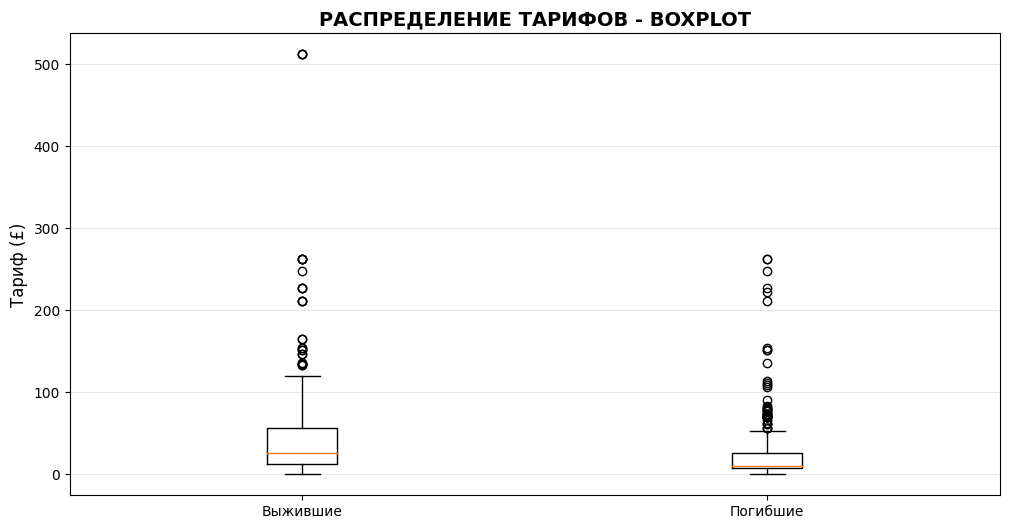

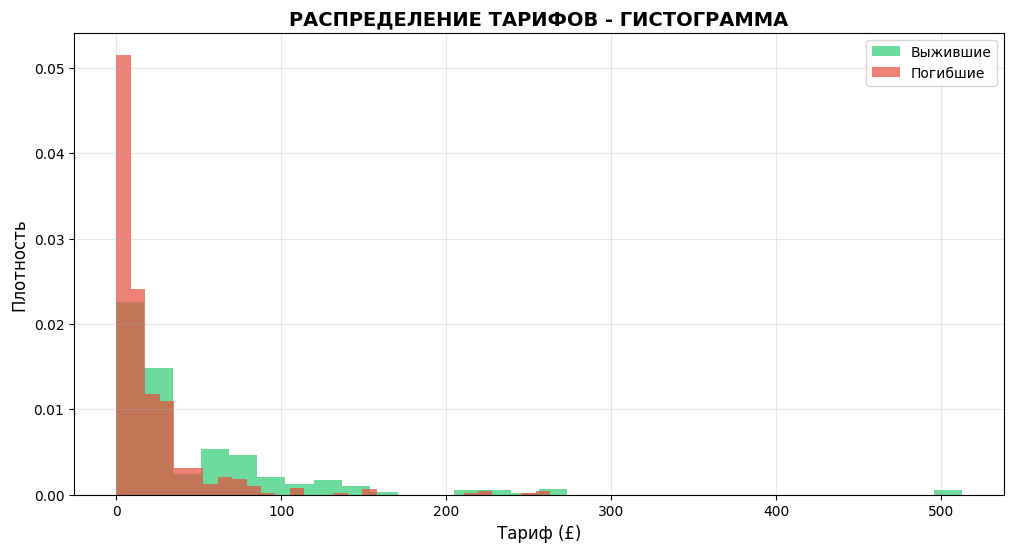

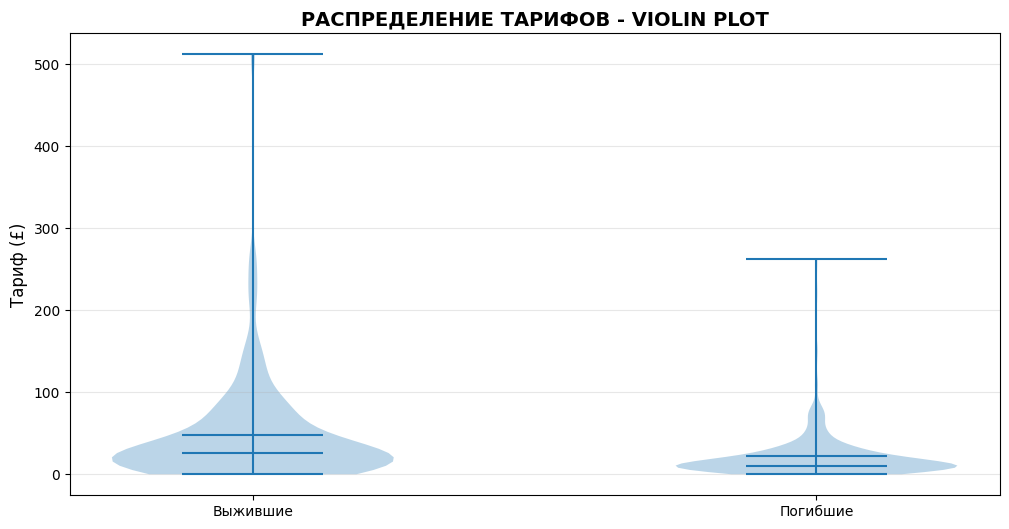

/tmp/ipykernel_39/30539210.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('FareGroup')['Survived'].agg(['count', 'sum', 'mean'])


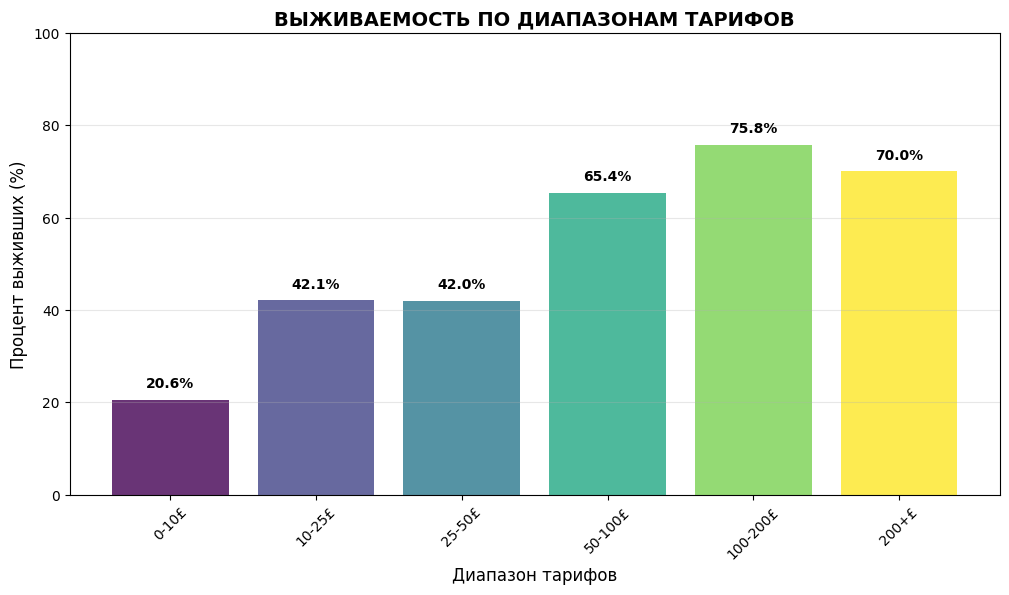

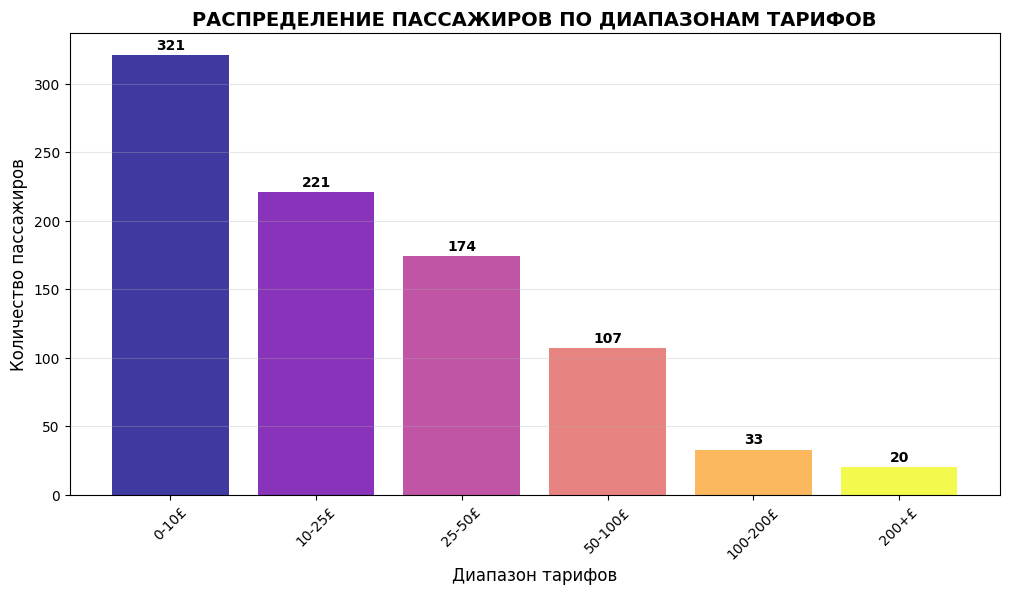

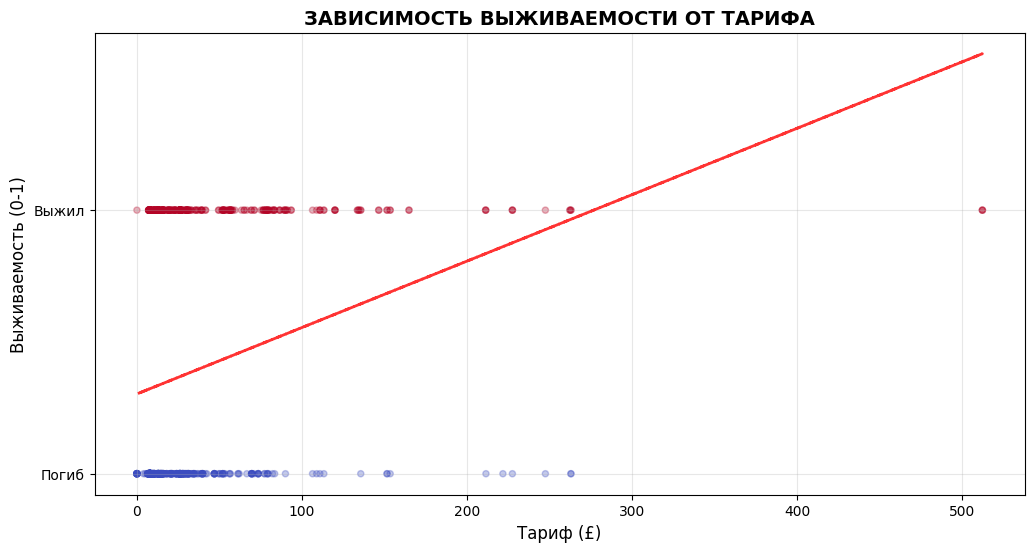

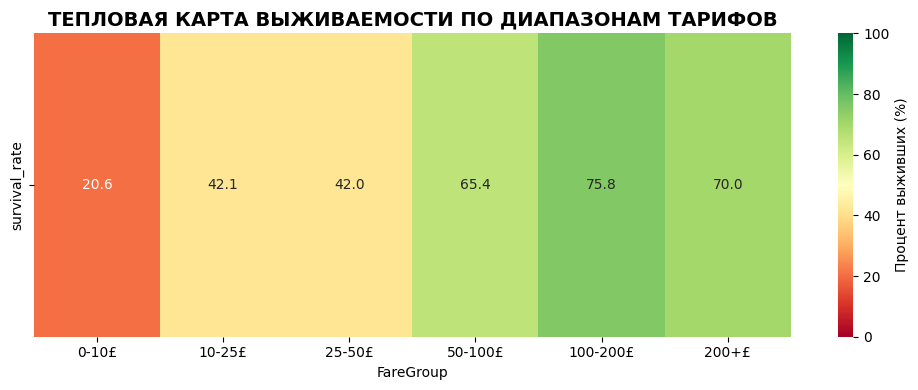

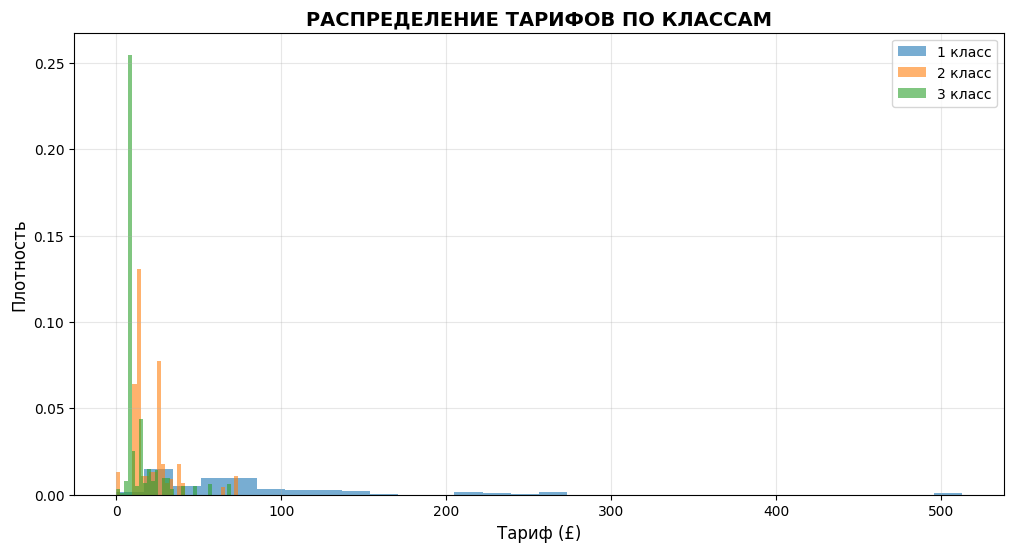

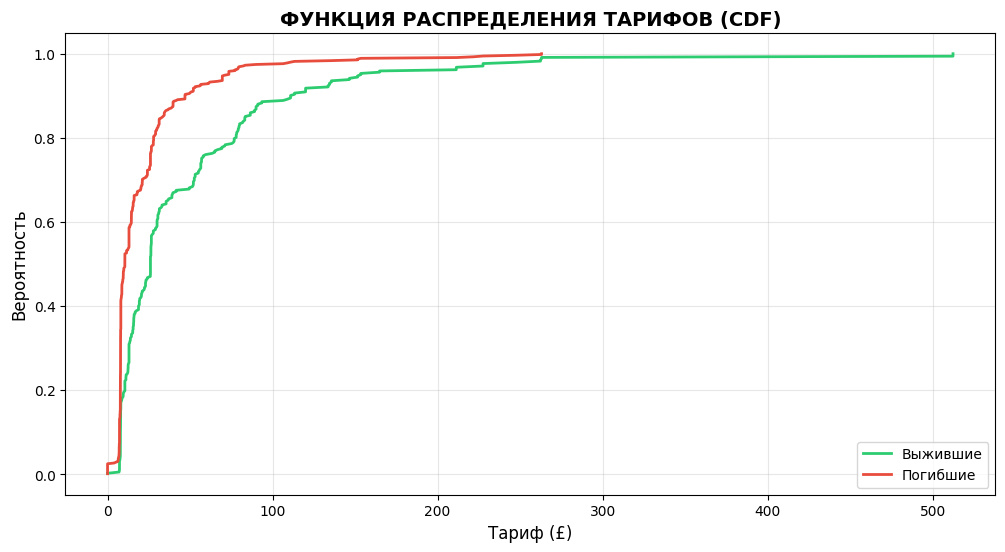


📊 ДЕТАЛЬНАЯ СТАТИСТИКА ПО ДИАПАЗОНАМ ТАРИФОВ:
Диапазон   Всего    Выжило   Выживаемость % от общего  Ср. тариф 
-------------------------------------------------------------------------------------
0-10£      321.0    66.0     20.6       % 36.0       % 7.87     £
10-25£     221.0    93.0     42.1       % 24.8       % 15.46    £
25-50£     174.0    73.0     42.0       % 19.5       % 31.18    £
50-100£    107.0    70.0     65.4       % 12.0       % 69.31    £
100-200£   33.0     25.0     75.8       % 3.7        % 131.11   £
200+£      20.0     14.0     70.0       % 2.2        % 279.31   £
-------------------------------------------------------------------------------------


In [21]:
print("СТАТИСТИКА ПО ЦЕНЕ БИЛЕТА:")
print("=" * 60)
survived_fare = df[df['Survived'] == 1]['Fare']
died_fare = df[df['Survived'] == 0]['Fare']
print("ВЫЖИВШИЕ:")
print(survived_fare.describe())
print("\nПОГИБШИЕ:")
print(died_fare.describe())

# ГРАФИК 1: Boxplot тарифов
plt.figure(figsize=(12, 6))
box_data = [survived_fare, died_fare]
plt.boxplot(box_data, labels=['Выжившие', 'Погибшие'])
plt.title('РАСПРЕДЕЛЕНИЕ ТАРИФОВ - BOXPLOT', fontweight='bold', fontsize=14)
plt.ylabel('Тариф (£)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# ГРАФИК 2: Гистограмма тарифов
plt.figure(figsize=(12, 6))
plt.hist(survived_fare, bins=30, alpha=0.7, color='#2ecc71', label='Выжившие', density=True)
plt.hist(died_fare, bins=30, alpha=0.7, color='#e74c3c', label='Погибшие', density=True)
plt.title('РАСПРЕДЕЛЕНИЕ ТАРИФОВ - ГИСТОГРАММА', fontweight='bold', fontsize=14)
plt.xlabel('Тариф (£)', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ГРАФИК 3: Violin plot
plt.figure(figsize=(12, 6))
violin_data = [survived_fare, died_fare]
plt.violinplot(violin_data, showmeans=True, showmedians=True)
plt.title('РАСПРЕДЕЛЕНИЕ ТАРИФОВ - VIOLIN PLOT', fontweight='bold', fontsize=14)
plt.xticks([1, 2], ['Выжившие', 'Погибшие'])
plt.ylabel('Тариф (£)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Создаем диапазоны тарифов для следующих графиков
fare_bins = [0, 10, 25, 50, 100, 200, 600]
fare_labels = ['0-10£', '10-25£', '25-50£', '50-100£', '100-200£', '200+£']
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)
fare_survival = df.groupby('FareGroup')['Survived'].agg(['count', 'sum', 'mean'])
fare_survival['survival_rate'] = fare_survival['mean'] * 100

# ГРАФИК 4: Выживаемость по диапазонам тарифов
plt.figure(figsize=(12, 6))
bars = plt.bar(fare_labels, fare_survival['survival_rate'], 
               color=plt.cm.viridis(np.linspace(0, 1, len(fare_labels))), alpha=0.8)
plt.title('ВЫЖИВАЕМОСТЬ ПО ДИАПАЗОНАМ ТАРИФОВ', fontweight='bold', fontsize=14)
plt.xlabel('Диапазон тарифов', fontsize=12)
plt.ylabel('Процент выживших (%)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

for bar, rate in zip(bars, fare_survival['survival_rate']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.show()

# ГРАФИК 5: Количество пассажиров по диапазонам тарифов
plt.figure(figsize=(12, 6))
plt.bar(fare_labels, fare_survival['count'], 
        color=plt.cm.plasma(np.linspace(0, 1, len(fare_labels))), alpha=0.8)
plt.title('РАСПРЕДЕЛЕНИЕ ПАССАЖИРОВ ПО ДИАПАЗОНАМ ТАРИФОВ', fontweight='bold', fontsize=14)
plt.xlabel('Диапазон тарифов', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for i, count in enumerate(fare_survival['count']):
    plt.text(i, count + 2, f'{count}', ha='center', va='bottom', fontweight='bold')
plt.show()

# ГРАФИК 6: Scatter plot тариф vs выживаемость
plt.figure(figsize=(12, 6))
plt.scatter(df['Fare'], df['Survived'], alpha=0.3, c=df['Survived'], 
           cmap='coolwarm', s=20)
plt.title('ЗАВИСИМОСТЬ ВЫЖИВАЕМОСТИ ОТ ТАРИФА', fontweight='bold', fontsize=14)
plt.xlabel('Тариф (£)', fontsize=12)
plt.ylabel('Выживаемость (0-1)', fontsize=12)
plt.yticks([0, 1], ['Погиб', 'Выжил'])
plt.grid(alpha=0.3)
z = np.polyfit(df['Fare'], df['Survived'], 1)
p = np.poly1d(z)
plt.plot(df['Fare'], p(df['Fare']), "r--", alpha=0.8, linewidth=2)
plt.show()

# ГРАФИК 7: Heatmap выживаемости по диапазонам тарифов
plt.figure(figsize=(10, 4))
heatmap_data = fare_survival[['survival_rate']].T
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn', 
            vmin=0, vmax=100, cbar_kws={'label': 'Процент выживших (%)'})
plt.title('ТЕПЛОВАЯ КАРТА ВЫЖИВАЕМОСТИ ПО ДИАПАЗОНАМ ТАРИФОВ', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# ГРАФИК 8: Распределение тарифов по классам
plt.figure(figsize=(12, 6))
for pclass in [1, 2, 3]:
    class_fares = df[df['Pclass'] == pclass]['Fare']
    plt.hist(class_fares, bins=30, alpha=0.6, label=f'{pclass} класс', density=True)
plt.title('РАСПРЕДЕЛЕНИЕ ТАРИФОВ ПО КЛАССАМ', fontweight='bold', fontsize=14)
plt.xlabel('Тариф (£)', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ГРАФИК 9: CDF (Cumulative Distribution Function)
plt.figure(figsize=(12, 6))
sorted_survived = np.sort(survived_fare)
sorted_died = np.sort(died_fare)
y_survived = np.arange(1, len(sorted_survived)+1) / len(sorted_survived)
y_died = np.arange(1, len(sorted_died)+1) / len(sorted_died)
plt.plot(sorted_survived, y_survived, label='Выжившие', color='#2ecc71', linewidth=2)
plt.plot(sorted_died, y_died, label='Погибшие', color='#e74c3c', linewidth=2)
plt.title('ФУНКЦИЯ РАСПРЕДЕЛЕНИЯ ТАРИФОВ (CDF)', fontweight='bold', fontsize=14)
plt.xlabel('Тариф (£)', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Детальная статистика
print("\n📊 ДЕТАЛЬНАЯ СТАТИСТИКА ПО ДИАПАЗОНАМ ТАРИФОВ:")
print("=" * 85)
print(f"{'Диапазон':<10} {'Всего':<8} {'Выжило':<8} {'Выживаемость':<12} {'% от общего':<12} {'Ср. тариф':<10}")
print("-" * 85)
total_passengers = len(df)
for i, fare_group in enumerate(fare_labels):
    data = fare_survival.iloc[i]
    percent_of_total = (data['count'] / total_passengers) * 100
    avg_fare = df[df['FareGroup'] == fare_group]['Fare'].mean()
    print(f"{fare_group:<10} {data['count']:<8} {data['sum']:<8} {data['survival_rate']:<11.1f}% {percent_of_total:<11.1f}% {avg_fare:<9.2f}£")
print("-" * 85)

# Гипотеза подтвердилась: Цена билета влияет на выживаемость.

# **Гипотеза:**
# На выживаемость влияли титулы

РАСПРЕДЕЛЕНИЕ ПО ТИТУЛАМ:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

ВЫЖИВАЕМОСТЬ ПО ТИТУЛАМ:
Capt: 0.0 из 1.0 выжило (  0.0%)
Col: 1.0 из 2.0 выжило ( 50.0%)
Countess: 1.0 из 1.0 выжило (100.0%)
Don: 0.0 из 1.0 выжило (  0.0%)
Dr: 3.0 из 7.0 выжило ( 42.9%)
Jonkheer: 0.0 из 1.0 выжило (  0.0%)
Lady: 1.0 из 1.0 выжило (100.0%)
Major: 1.0 из 2.0 выжило ( 50.0%)
Master: 23.0 из 40.0 выжило ( 57.5%)
Miss: 127.0 из 182.0 выжило ( 69.8%)
Mlle: 2.0 из 2.0 выжило (100.0%)
Mme: 1.0 из 1.0 выжило (100.0%)
Mr: 81.0 из 517.0 выжило ( 15.7%)
Mrs: 99.0 из 125.0 выжило ( 79.2%)
Ms: 1.0 из 1.0 выжило (100.0%)
Rev: 0.0 из 6.0 выжило (  0.0%)
Sir: 1.0 из 1.0 выжило (100.0%)


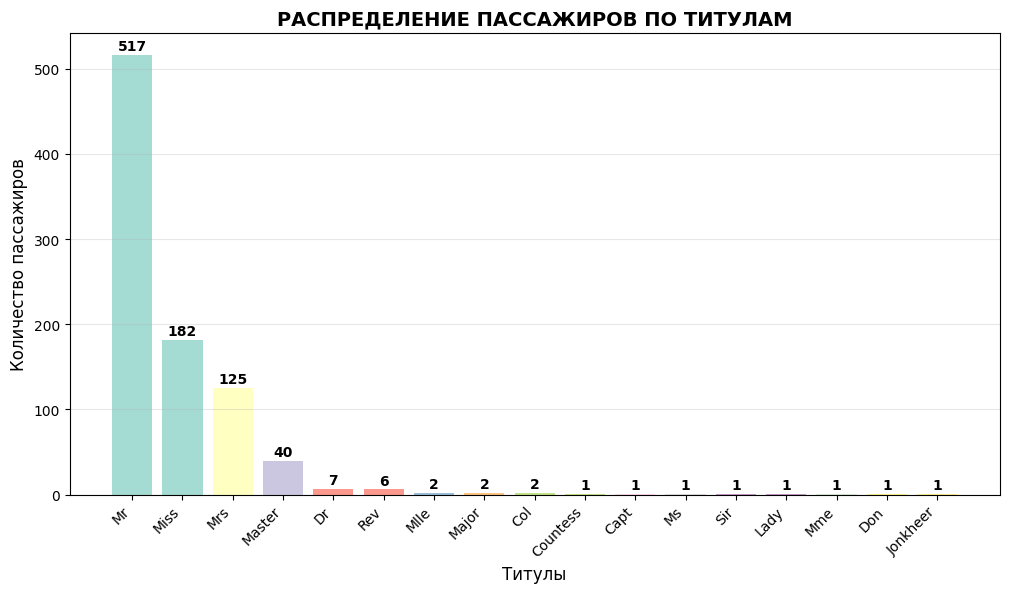

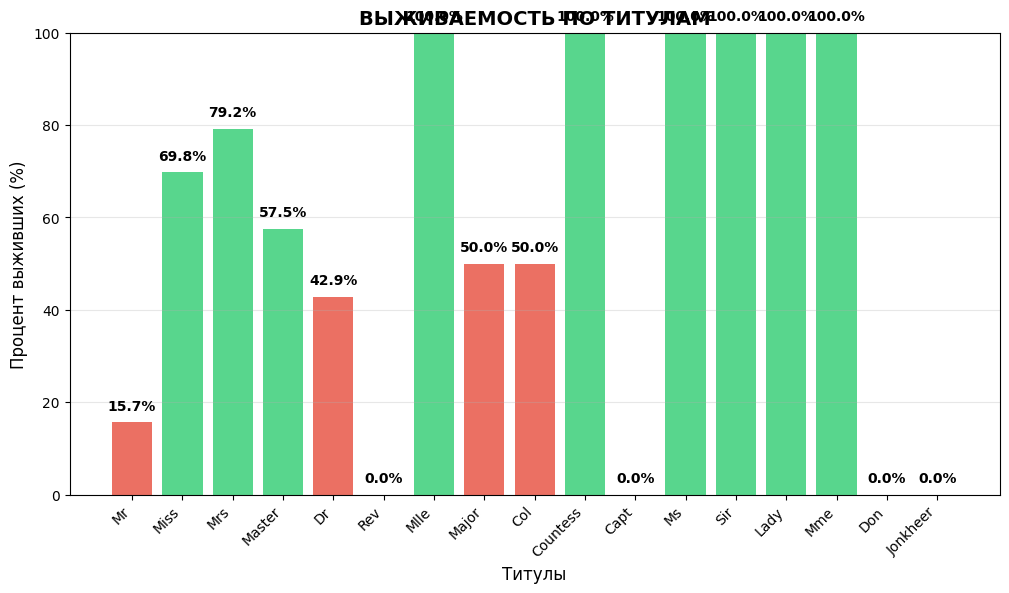

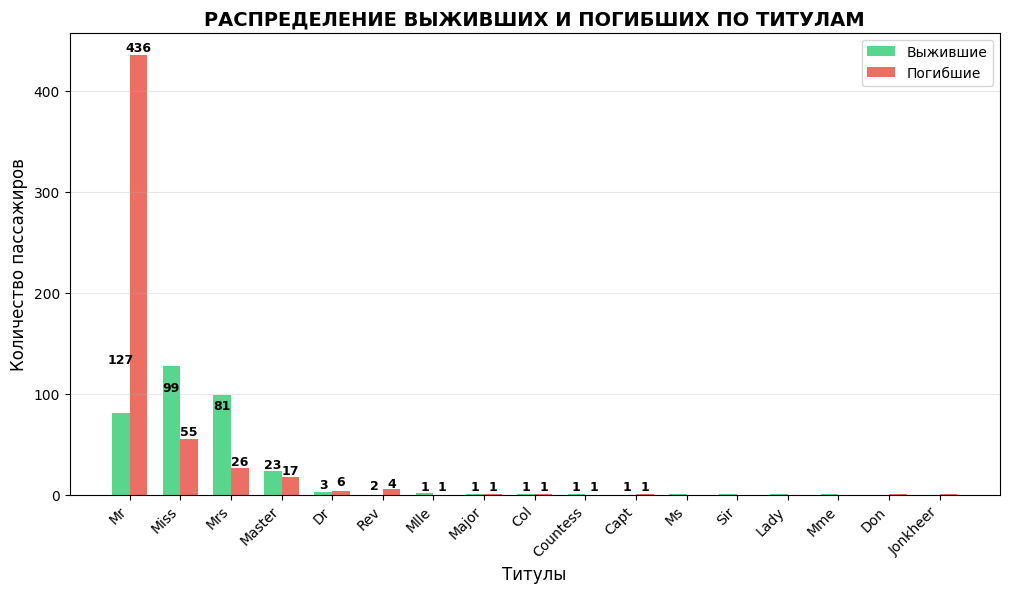

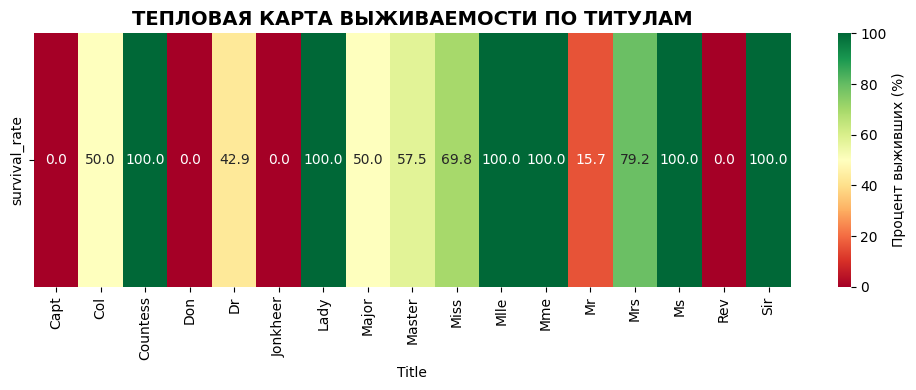

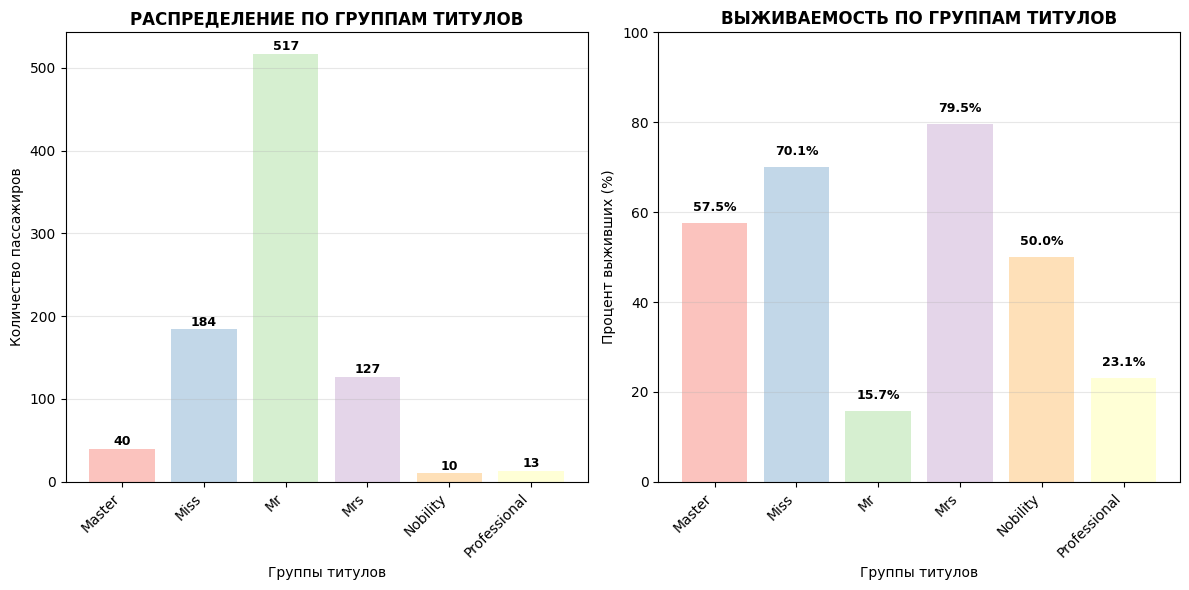

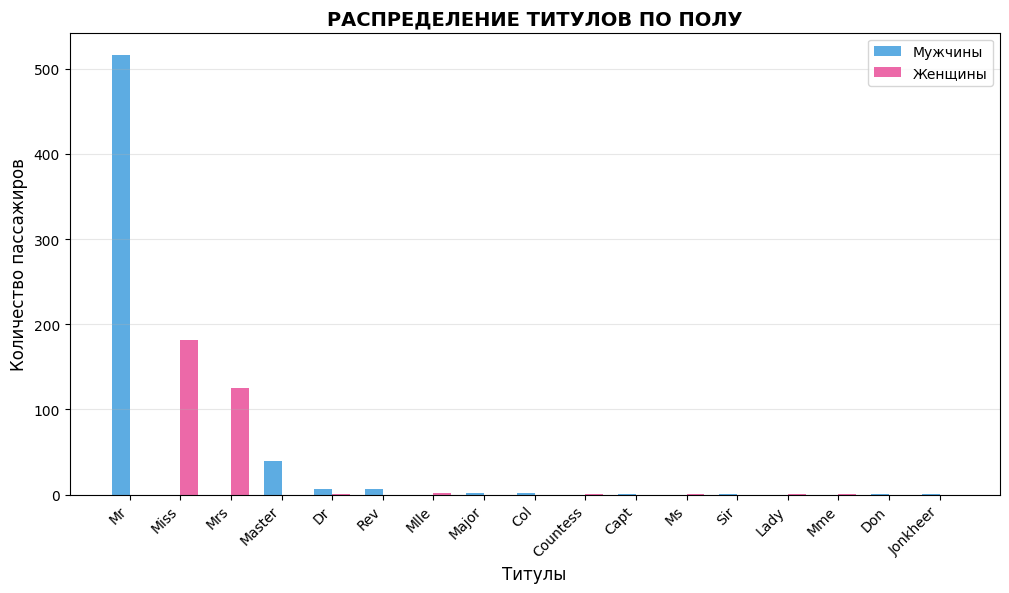

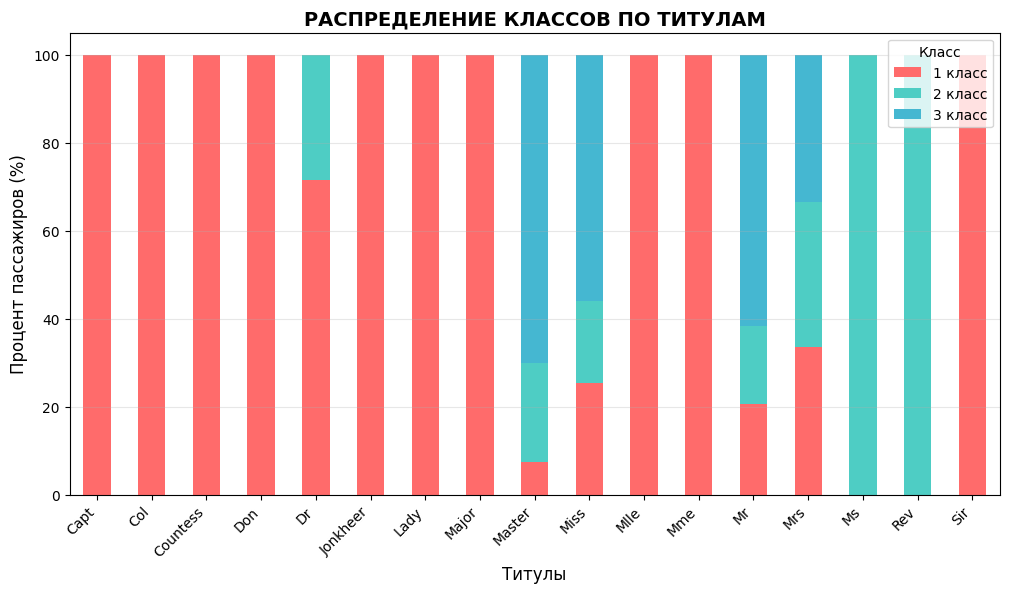

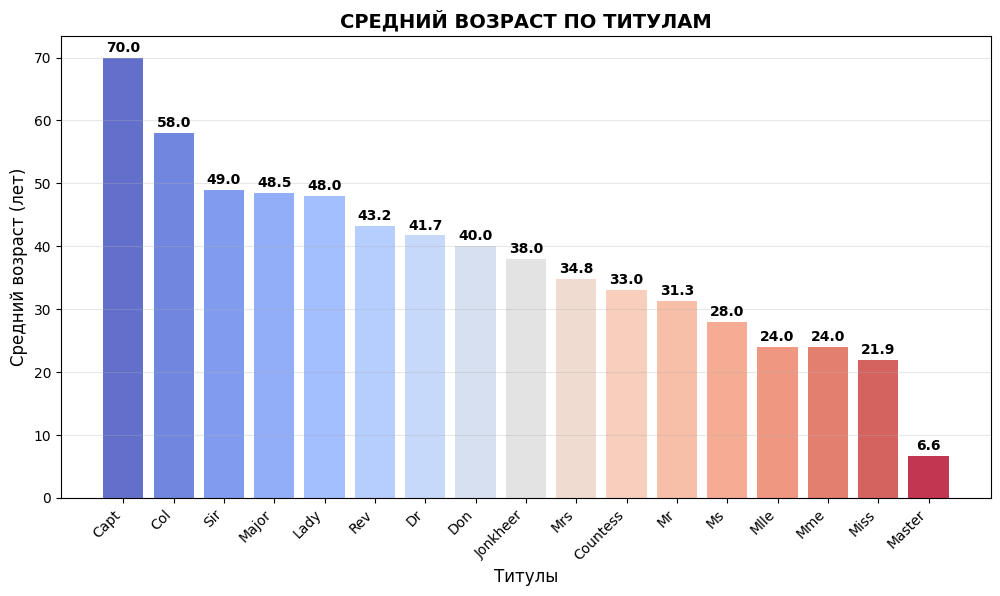


📊 ДЕТАЛЬНАЯ СТАТИСТИКА ПО ТИТУЛАМ:
Титул        Всего    Выжило   Выживаемость % от общего  Ср. возраст 
------------------------------------------------------------------------------------------
Capt         1.0      0.0      0.0        % 0.1        % 70.0       
Col          2.0      1.0      50.0       % 0.2        % 58.0       
Countess     1.0      1.0      100.0      % 0.1        % 33.0       
Don          1.0      0.0      0.0        % 0.1        % 40.0       
Dr           7.0      3.0      42.9       % 0.8        % 41.7       
Jonkheer     1.0      0.0      0.0        % 0.1        % 38.0       
Lady         1.0      1.0      100.0      % 0.1        % 48.0       
Major        2.0      1.0      50.0       % 0.2        % 48.5       
Master       40.0     23.0     57.5       % 4.5        % 6.6        
Miss         182.0    127.0    69.8       % 20.4       % 21.9       
Mlle         2.0      2.0      100.0      % 0.2        % 24.0       
Mme          1.0      1.0      100.0      % 

In [22]:
# Извлечение титулов из имен
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

print("РАСПРЕДЕЛЕНИЕ ПО ТИТУЛАМ:")
print("=" * 40)
title_counts = df['Title'].value_counts()
print(title_counts)

print("\nВЫЖИВАЕМОСТЬ ПО ТИТУЛАМ:")
print("=" * 40)
title_survival = df.groupby('Title')['Survived'].agg(['count', 'sum', 'mean'])
title_survival['survival_rate'] = title_survival['mean'] * 100
title_survival = title_survival.rename(columns={'count': 'total', 'sum': 'survived', 'mean': 'survival_prob'})

for title in title_survival.index:
    data = title_survival.loc[title]
    print(f"{title}: {data['survived']:>2} из {data['total']:>2} выжило ({data['survival_rate']:5.1f}%)")

# ГРУППИРОВКА ТИТУЛОВ ДЛЯ ЛУЧШЕЙ ВИЗУАЛИЗАЦИИ
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss', 
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Professional',
    'Rev': 'Professional',
    'Col': 'Nobility',
    'Major': 'Nobility',
    'Mlle': 'Miss',
    'Ms': 'Mrs',
    'Lady': 'Nobility',
    'Sir': 'Nobility',
    'Mme': 'Mrs',
    'Countess': 'Nobility',
    'Don': 'Nobility',
    'Jonkheer': 'Nobility',
    'Capt': 'Nobility'
}

df['TitleGroup'] = df['Title'].map(title_mapping)
df['TitleGroup'] = df['TitleGroup'].fillna('Other')

# ГРАФИК 1: Распределение титулов
plt.figure(figsize=(12, 6))
titles = title_counts.index
counts = title_counts.values
colors = plt.cm.Set3(np.linspace(0, 1, len(titles)))

bars = plt.bar(range(len(titles)), counts, color=colors, alpha=0.8)
plt.title('РАСПРЕДЕЛЕНИЕ ПАССАЖИРОВ ПО ТИТУЛАМ', fontweight='bold', fontsize=14)
plt.xlabel('Титулы', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.xticks(range(len(titles)), titles, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for i, count in enumerate(counts):
    plt.text(i, count + 2, f'{count}', ha='center', va='bottom', fontweight='bold')
plt.show()

# ГРАФИК 2: Выживаемость по титулам
plt.figure(figsize=(12, 6))
rates = [title_survival.loc[title, 'survival_rate'] for title in titles]
colors = ['#2ecc71' if rate > 50 else '#e74c3c' for rate in rates]

bars = plt.bar(range(len(titles)), rates, color=colors, alpha=0.8)
plt.title('ВЫЖИВАЕМОСТЬ ПО ТИТУЛАМ', fontweight='bold', fontsize=14)
plt.xlabel('Титулы', fontsize=12)
plt.ylabel('Процент выживших (%)', fontsize=12)
plt.xticks(range(len(titles)), titles, rotation=45, ha='right')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

for i, rate in enumerate(rates):
    plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.show()

# ГРАФИК 3: Сравнение выживших и погибших по титулам
plt.figure(figsize=(12, 6))
survived_by_title = df[df['Survived'] == 1]['Title'].value_counts()
died_by_title = df[df['Survived'] == 0]['Title'].value_counts()

x = np.arange(len(titles))
width = 0.35

bars1 = plt.bar(x - width/2, [survived_by_title.get(title, 0) for title in titles], 
                width, label='Выжившие', color='#2ecc71', alpha=0.8)
bars2 = plt.bar(x + width/2, [died_by_title.get(title, 0) for title in titles], 
                width, label='Погибшие', color='#e74c3c', alpha=0.8)

plt.title('РАСПРЕДЕЛЕНИЕ ВЫЖИВШИХ И ПОГИБШИХ ПО ТИТУЛАМ', fontweight='bold', fontsize=14)
plt.xlabel('Титулы', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.xticks(x, titles, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

for i, (surv, died) in enumerate(zip(survived_by_title, died_by_title)):
    if surv > 0:
        plt.text(i - width/2, surv + 0.5, f'{surv}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    if died > 0:
        plt.text(i + width/2, died + 0.5, f'{died}', ha='center', va='bottom', fontweight='bold', fontsize=9)
plt.show()

# ГРАФИК 4: Heatmap выживаемости по титулам
plt.figure(figsize=(10, 4))
heatmap_data = title_survival[['survival_rate']].T
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn', 
            vmin=0, vmax=100, cbar_kws={'label': 'Процент выживших (%)'})
plt.title('ТЕПЛОВАЯ КАРТА ВЫЖИВАЕМОСТИ ПО ТИТУЛАМ', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# ГРАФИК 5: Анализ сгруппированных титулов
plt.figure(figsize=(12, 6))
title_group_survival = df.groupby('TitleGroup')['Survived'].agg(['count', 'sum', 'mean'])
title_group_survival['survival_rate'] = title_group_survival['mean'] * 100

groups = title_group_survival.index
group_rates = title_group_survival['survival_rate']
group_counts = title_group_survival['count']

plt.subplot(1, 2, 1)
bars = plt.bar(groups, group_counts, color=plt.cm.Pastel1(range(len(groups))), alpha=0.8)
plt.title('РАСПРЕДЕЛЕНИЕ ПО ГРУППАМ ТИТУЛОВ', fontweight='bold', fontsize=12)
plt.xlabel('Группы титулов', fontsize=10)
plt.ylabel('Количество пассажиров', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for i, count in enumerate(group_counts):
    plt.text(i, count + 1, f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.subplot(1, 2, 2)
bars = plt.bar(groups, group_rates, color=plt.cm.Pastel1(range(len(groups))), alpha=0.8)
plt.title('ВЫЖИВАЕМОСТЬ ПО ГРУППАМ ТИТУЛОВ', fontweight='bold', fontsize=12)
plt.xlabel('Группы титулов', fontsize=10)
plt.ylabel('Процент выживших (%)', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

for i, rate in enumerate(group_rates):
    plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# ГРАФИК 6: Связь титулов с полом
plt.figure(figsize=(12, 6))
title_sex = df.groupby(['Title', 'Sex']).size().unstack(fill_value=0)

x = np.arange(len(titles))
width = 0.35

male_counts = [title_sex.loc[title, 'male'] if 'male' in title_sex.columns else 0 for title in titles]
female_counts = [title_sex.loc[title, 'female'] if 'female' in title_sex.columns else 0 for title in titles]

bars1 = plt.bar(x - width/2, male_counts, width, label='Мужчины', color='#3498db', alpha=0.8)
bars2 = plt.bar(x + width/2, female_counts, width, label='Женщины', color='#e84393', alpha=0.8)

plt.title('РАСПРЕДЕЛЕНИЕ ТИТУЛОВ ПО ПОЛУ', fontweight='bold', fontsize=14)
plt.xlabel('Титулы', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.xticks(x, titles, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# ГРАФИК 7: Связь титулов с классом
plt.figure(figsize=(12, 6))
title_class = df.groupby(['Title', 'Pclass']).size().unstack(fill_value=0)
title_class_percent = title_class.div(title_class.sum(axis=1), axis=0) * 100

title_class_percent.plot(kind='bar', stacked=True, 
                        color=['#FF6B6B', '#4ECDC4', '#45B7D1'],
                        ax=plt.gca())
plt.title('РАСПРЕДЕЛЕНИЕ КЛАССОВ ПО ТИТУЛАМ', fontweight='bold', fontsize=14)
plt.xlabel('Титулы', fontsize=12)
plt.ylabel('Процент пассажиров (%)', fontsize=12)
plt.legend(title='Класс', labels=['1 класс', '2 класс', '3 класс'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.show()

# ГРАФИК 8: Средний возраст по титулам
plt.figure(figsize=(12, 6))
age_by_title = df.groupby('Title')['Age'].mean().sort_values(ascending=False)

bars = plt.bar(range(len(age_by_title)), age_by_title.values, 
               color=plt.cm.coolwarm(np.linspace(0, 1, len(age_by_title))), alpha=0.8)
plt.title('СРЕДНИЙ ВОЗРАСТ ПО ТИТУЛАМ', fontweight='bold', fontsize=14)
plt.xlabel('Титулы', fontsize=12)
plt.ylabel('Средний возраст (лет)', fontsize=12)
plt.xticks(range(len(age_by_title)), age_by_title.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for i, age in enumerate(age_by_title.values):
    plt.text(i, age + 0.5, f'{age:.1f}', ha='center', va='bottom', fontweight='bold')
plt.show()

# ДЕТАЛЬНАЯ СТАТИСТИКА
print("\n📊 ДЕТАЛЬНАЯ СТАТИСТИКА ПО ТИТУЛАМ:")
print("=" * 90)
print(f"{'Титул':<12} {'Всего':<8} {'Выжило':<8} {'Выживаемость':<12} {'% от общего':<12} {'Ср. возраст':<12}")
print("-" * 90)

total_passengers = len(df)
for title in title_survival.index:
    data = title_survival.loc[title]
    percent_of_total = (data['total'] / total_passengers) * 100
    avg_age = df[df['Title'] == title]['Age'].mean()
    
    print(f"{title:<12} {data['total']:<8} {data['survived']:<8} {data['survival_rate']:<11.1f}% {percent_of_total:<11.1f}% {avg_age:<11.1f}")

print("-" * 90)

# КЛЮЧЕВЫЕ ВЫВОДЫ
best_title = title_survival['survival_rate'].idxmax()
worst_title = title_survival['survival_rate'].idxmin()

print(f"\n🎯 КЛЮЧЕВЫЕ ВЫВОДЫ:")
print(f"• Лучшая выживаемость: '{best_title}' ({title_survival.loc[best_title, 'survival_rate']:.1f}%)")
print(f"• Худшая выживаемость: '{worst_title}' ({title_survival.loc[worst_title, 'survival_rate']:.1f}%)")
print(f"• Разница: {title_survival.loc[best_title, 'survival_rate'] - title_survival.loc[worst_title, 'survival_rate']:.1f}%")

# Анализ по группам титулов
print(f"\n📈 СТАТИСТИКА ПО ГРУППАМ ТИТУЛОВ:")
for group in title_group_survival.index:
    data = title_group_survival.loc[group]
    print(f"  {group}: {data['survival_rate']:.1f}% выживаемость ({data['count']} чел.)")

# Гипотеза подтвердилась: Титулы влияли на выживаемость

🎯 FEATURE ENGINEERING И АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ
1. СОЗДАНИЕ НОВЫХ ПРИЗНАКОВ...
✅ Новые признаки созданы!

2. ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИ...
✅ Данные подготовлены!

3. АНАЛИЗ КОРРЕЛЯЦИЙ...


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


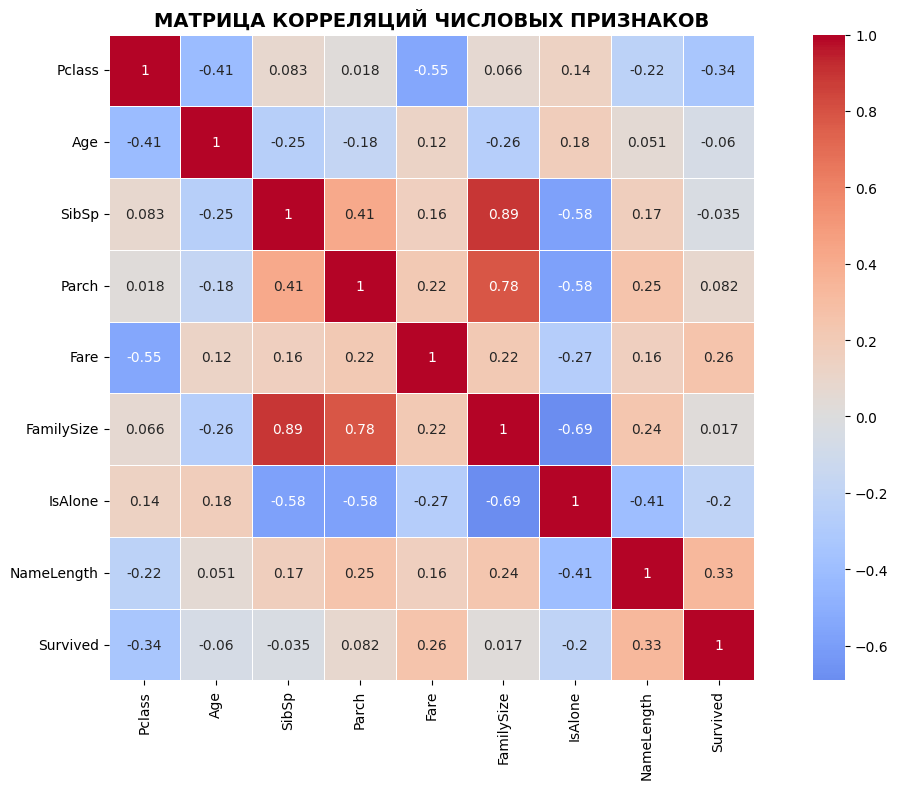


КОРРЕЛЯЦИИ С ТАРГЕТОМ (Survived):
NameLength  :   0.332
Fare        :   0.257
Parch       :   0.082
FamilySize  :   0.017
SibSp       :  -0.035
Age         :  -0.060
IsAlone     :  -0.203
Pclass      :  -0.338

📊 РАЗМЕРЫ ДАННЫХ:
Обучающая выборка: (712, 13)
Тестовая выборка:  (179, 13)

4. ОБУЧЕНИЕ МОДЕЛИ И АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ...
✅ Точность модели: 0.827


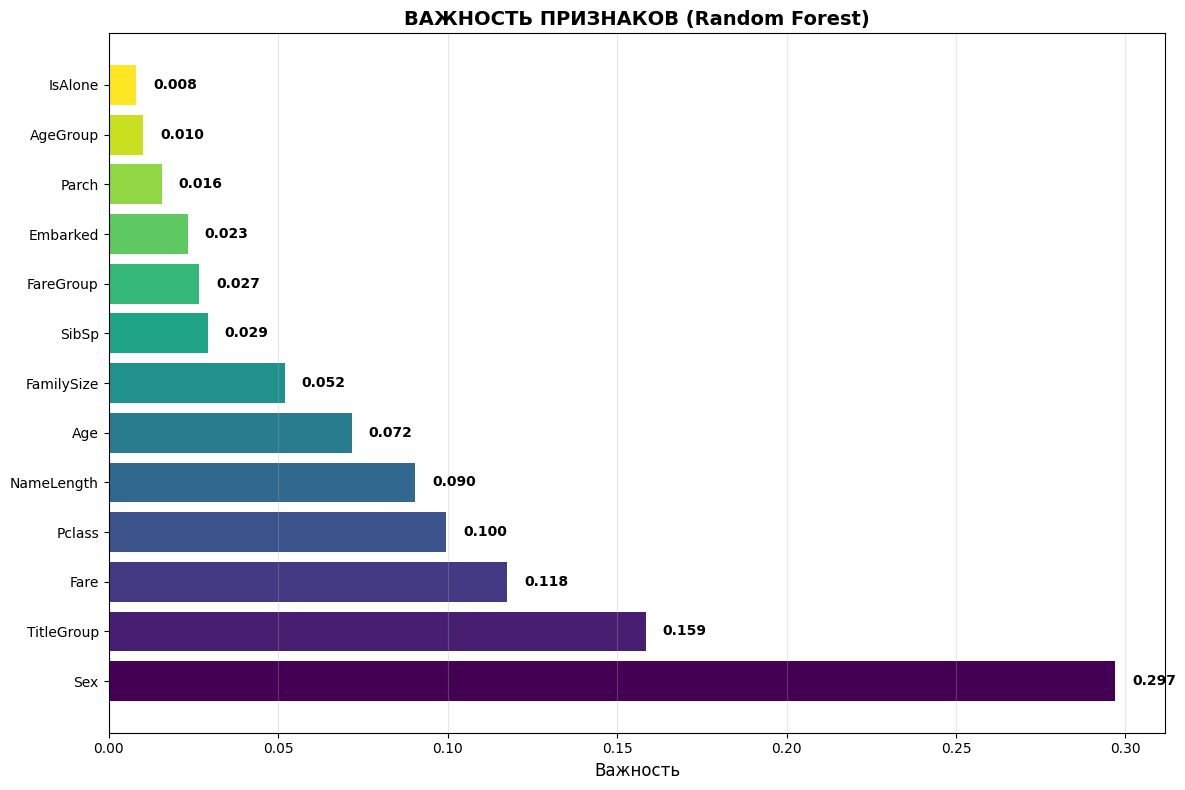


📈 ТОП-10 ВАЖНЫХ ПРИЗНАКОВ:
Sex            : 0.297
TitleGroup     : 0.159
Fare           : 0.118
Pclass         : 0.100
NameLength     : 0.090
Age            : 0.072
FamilySize     : 0.052
SibSp          : 0.029
FareGroup      : 0.027
Embarked       : 0.023

5. ОТЧЕТ КЛАССИФИКАЦИИ:
              precision    recall  f1-score   support

       Погиб       0.84      0.89      0.86       110
       Выжил       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



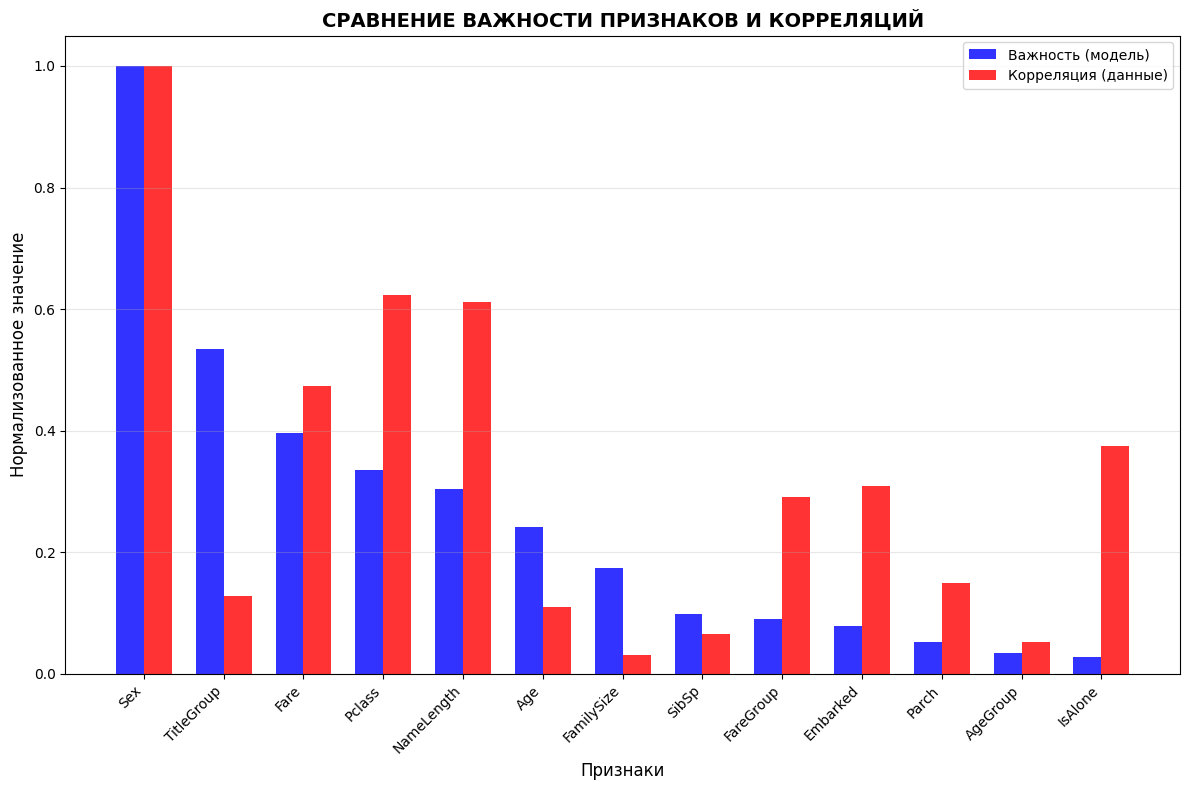


6. АНАЛИЗ ВЗАИМОДЕЙСТВИЯ ПРИЗНАКОВ...

📊 ВЫЖИВАЕМОСТЬ ПО КОМБИНАЦИЯМ ПРИЗНАКОВ:
Пол + Класс (топ-5):
  0_1: 96.8%
  0_2: 92.1%
  0_3: 50.0%
  1_1: 36.9%
  1_2: 15.7%

Возраст + Тариф (топ-3):
  (0.34, 16.336]_(204.932, 307.398]: 100.0%
  (32.252, 48.168]_(409.863, 512.329]: 100.0%
  (32.252, 48.168]_(102.466, 204.932]: 92.3%

🎯 ФИНАЛЬНЫЕ ВЫВОДЫ:
✅ САМЫЕ ВАЖНЫЕ ПРИЗНАКИ:
  1. Sex
  2. TitleGroup
  3. Fare
  4. Pclass
  5. NameLength

✅ ТОЧНОСТЬ МОДЕЛИ: 82.7%
✅ КОЛИЧЕСТВО ПРИЗНАКОВ: 13
✅ РАЗМЕР ВЫБОРКИ: 891 пассажиров

💡 РЕКОМЕНДАЦИИ ПО ДАЛЬНЕЙШЕМУ FEATURE ENGINEERING:
  1. Добавить взаимодействия: Пол × Класс, Возраст × Тариф
  2. Создать бины для возраста и тарифов с оптимальными границами
  3. Использовать one-hot encoding для категориальных признаков
  4. Попробовать полиномиальные признаки для числовых переменных
  5. Добавить признаки из номера кабины (палуба)

💾 ПОДГОТОВЛЕННЫЕ ДАННЫЕ СОХРАНЕНЫ:
   Признаки: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySiz

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

print("🎯 FEATURE ENGINEERING И АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ")
print("=" * 60)

# Создаем новые признаки
print("1. СОЗДАНИЕ НОВЫХ ПРИЗНАКОВ...")

# Семейные признаки
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Признаки из имени
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Professional', 'Rev': 'Professional', 'Col': 'Nobility', 
    'Major': 'Nobility', 'Mlle': 'Miss', 'Ms': 'Mrs', 'Lady': 'Nobility',
    'Sir': 'Nobility', 'Mme': 'Mrs', 'Countess': 'Nobility', 
    'Don': 'Nobility', 'Jonkheer': 'Nobility', 'Capt': 'Nobility'
}
df['TitleGroup'] = df['Title'].map(title_mapping)
df['TitleGroup'] = df['TitleGroup'].fillna('Other')

# Возрастные группы
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])

# Группы тарифов
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 10, 25, 50, 100, 600], 
                         labels=['Low', 'Medium', 'High', 'VeryHigh', 'Luxury'])

# Длина имени (как proxy для социального статуса)
df['NameLength'] = df['Name'].str.len()

print("✅ Новые признаки созданы!")

# Кодируем категориальные переменные
print("\n2. ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИ...")

# Выбираем фичи для модели
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
           'FamilySize', 'IsAlone', 'NameLength', 'TitleGroup', 'AgeGroup', 'FareGroup']

# Создаем копию датасета для моделирования
df_model = df[features + ['Survived']].copy()

# Кодируем категориальные переменные
label_encoders = {}
for col in ['Sex', 'Embarked', 'TitleGroup', 'AgeGroup', 'FareGroup']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

# Заполняем пропуски
df_model['Age'] = df_model['Age'].fillna(df_model['Age'].median())
df_model['Embarked'] = df_model['Embarked'].fillna(df_model['Embarked'].mode()[0])

print("✅ Данные подготовлены!")

# Анализ корреляций
print("\n3. АНАЛИЗ КОРРЕЛЯЦИЙ...")

# Числовые признаки для корреляционного анализа
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 
                   'IsAlone', 'NameLength', 'Survived']

plt.figure(figsize=(12, 8))
correlation_matrix = df_model[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, linewidths=0.5)
plt.title('МАТРИЦА КОРРЕЛЯЦИЙ ЧИСЛОВЫХ ПРИЗНАКОВ', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# Корреляции с таргетом
target_correlations = df_model[numeric_features].corr()['Survived'].sort_values(ascending=False)
print("\nКОРРЕЛЯЦИИ С ТАРГЕТОМ (Survived):")
print("=" * 40)
for feature, corr in target_correlations.items():
    if feature != 'Survived':
        print(f"{feature:<12}: {corr:>7.3f}")

# Разделение на train/test
X = df_model[features]
y = df_model['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

print(f"\n📊 РАЗМЕРЫ ДАННЫХ:")
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка:  {X_test.shape}")

# Обучаем модель Random Forest для анализа важности признаков
print("\n4. ОБУЧЕНИЕ МОДЕЛИ И АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ...")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

# Предсказания
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Точность модели: {accuracy:.3f}")

# Важность признаков
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# ГРАФИК: Важность признаков
plt.figure(figsize=(12, 8))
bars = plt.barh(feature_importance['feature'], feature_importance['importance'],
                color=plt.cm.viridis(np.linspace(0, 1, len(features))))
plt.title('ВАЖНОСТЬ ПРИЗНАКОВ (Random Forest)', fontweight='bold', fontsize=14)
plt.xlabel('Важность', fontsize=12)
plt.grid(axis='x', alpha=0.3)

for bar, importance in zip(bars, feature_importance['importance']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{importance:.3f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Детальный анализ топ-признаков
print("\n📈 ТОП-10 ВАЖНЫХ ПРИЗНАКОВ:")
print("=" * 45)
for i, row in feature_importance.head(10).iterrows():
    print(f"{row['feature']:<15}: {row['importance']:.3f}")

# Анализ производительности модели
print(f"\n5. ОТЧЕТ КЛАССИФИКАЦИИ:")
print("=" * 40)
print(classification_report(y_test, y_pred, target_names=['Погиб', 'Выжил']))

# ГРАФИК: Сравнение корреляций и важности признаков
plt.figure(figsize=(12, 8))

# Нормализуем важность для сравнения
feature_importance['importance_norm'] = feature_importance['importance'] / feature_importance['importance'].max()

# Собираем корреляции для тех же признаков
corr_values = []
for feature in feature_importance['feature']:
    if feature in df_model.columns:
        corr = abs(df_model[feature].corr(df_model['Survived']))
        corr_values.append(corr)
    else:
        corr_values.append(0)

feature_importance['correlation'] = corr_values
feature_importance['correlation_norm'] = feature_importance['correlation'] / feature_importance['correlation'].max()

# Создаем сравнительный график
x = np.arange(len(feature_importance))
width = 0.35

plt.bar(x - width/2, feature_importance['importance_norm'], width, 
        label='Важность (модель)', alpha=0.8, color='blue')
plt.bar(x + width/2, feature_importance['correlation_norm'], width, 
        label='Корреляция (данные)', alpha=0.8, color='red')

plt.title('СРАВНЕНИЕ ВАЖНОСТИ ПРИЗНАКОВ И КОРРЕЛЯЦИЙ', fontweight='bold', fontsize=14)
plt.xlabel('Признаки', fontsize=12)
plt.ylabel('Нормализованное значение', fontsize=12)
plt.xticks(x, feature_importance['feature'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Анализ взаимодействия признаков
print("\n6. АНАЛИЗ ВЗАИМОДЕЙСТВИЯ ПРИЗНАКОВ...")

# Создаем комбинированные признаки
df_model['Sex_Pclass'] = df_model['Sex'].astype(str) + '_' + df_model['Pclass'].astype(str)
df_model['Age_Fare'] = pd.cut(df_model['Age'], bins=5).astype(str) + '_' + pd.cut(df_model['Fare'], bins=5).astype(str)

# Анализируем выживаемость для комбинаций
print("\n📊 ВЫЖИВАЕМОСТЬ ПО КОМБИНАЦИЯМ ПРИЗНАКОВ:")
print("=" * 50)

# Пол + Класс
sex_class_survival = df_model.groupby('Sex_Pclass')['Survived'].mean().sort_values(ascending=False)
print("Пол + Класс (топ-5):")
for combo, rate in sex_class_survival.head().items():
    print(f"  {combo}: {rate:.1%}")

# Возраст + Тариф
age_fare_survival = df_model.groupby('Age_Fare')['Survived'].mean().sort_values(ascending=False)
print("\nВозраст + Тариф (топ-3):")
for combo, rate in age_fare_survival.head(3).items():
    print(f"  {combo}: {rate:.1%}")

# ФИНАЛЬНЫЕ ВЫВОДЫ
print("\n🎯 ФИНАЛЬНЫЕ ВЫВОДЫ:")
print("=" * 50)
print("✅ САМЫЕ ВАЖНЫЕ ПРИЗНАКИ:")
top_features = feature_importance.head(5)['feature'].tolist()
for i, feature in enumerate(top_features, 1):
    print(f"  {i}. {feature}")

print(f"\n✅ ТОЧНОСТЬ МОДЕЛИ: {accuracy:.1%}")
print(f"✅ КОЛИЧЕСТВО ПРИЗНАКОВ: {len(features)}")
print(f"✅ РАЗМЕР ВЫБОРКИ: {len(df_model)} пассажиров")

# Рекомендации по feature engineering
print("\n💡 РЕКОМЕНДАЦИИ ПО ДАЛЬНЕЙШЕМУ FEATURE ENGINEERING:")
print("  1. Добавить взаимодействия: Пол × Класс, Возраст × Тариф")
print("  2. Создать бины для возраста и тарифов с оптимальными границами")
print("  3. Использовать one-hot encoding для категориальных признаков")
print("  4. Попробовать полиномиальные признаки для числовых переменных")
print("  5. Добавить признаки из номера кабины (палуба)")

# Сохраняем подготовленные данные
print(f"\n💾 ПОДГОТОВЛЕННЫЕ ДАННЫЕ СОХРАНЕНЫ:")
print(f"   Признаки: {list(X.columns)}")
print(f"   Размер: {X.shape}")

🎯 ЭКСПЕРИМЕНТЫ С МОДЕЛЯМИ МАШИННОГО ОБУЧЕНИЯ
1. ПОДГОТОВКА ДАННЫХ...
✅ Данные подготовлены!
📊 Размер данных: (891, 13)
🎯 Количество классов: 2
📈 Баланс классов: {0: 549, 1: 342}

2. ЗАПУСК ЭКСПЕРИМЕНТОВ...

🏃 Обучаем Logistic Regression...
   ✅ CV Accuracy: 0.8126 (±0.0196)
   ⏱️  Время обучения: 0.25 сек

🏃 Обучаем SVM Linear...
   ✅ CV Accuracy: 0.7901 (±0.0156)
   ⏱️  Время обучения: 0.25 сек

🏃 Обучаем SVM RBF...
   ✅ CV Accuracy: 0.8283 (±0.0147)
   ⏱️  Время обучения: 0.13 сек

🏃 Обучаем Decision Tree...
   ✅ CV Accuracy: 0.7654 (±0.0200)
   ⏱️  Время обучения: 0.04 сек

🏃 Обучаем Random Forest...
   ✅ CV Accuracy: 0.8260 (±0.0140)
   ⏱️  Время обучения: 1.12 сек

🏃 Обучаем Gradient Boosting...
   ✅ CV Accuracy: 0.8327 (±0.0181)
   ⏱️  Время обучения: 0.81 сек

🏃 Обучаем XGBoost...
   ✅ CV Accuracy: 0.8159 (±0.0219)
   ⏱️  Время обучения: 0.43 сек

🏃 Обучаем LightGBM...
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise mul

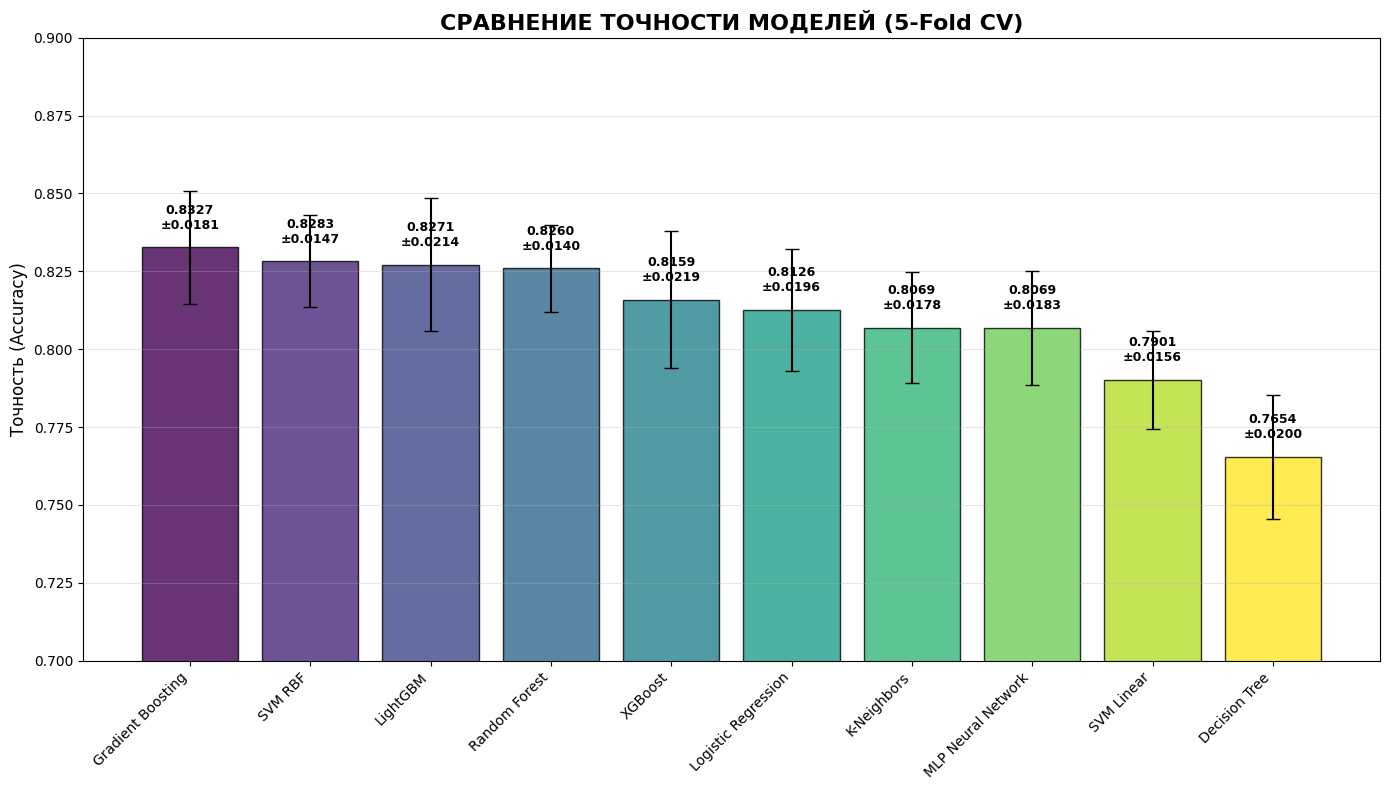

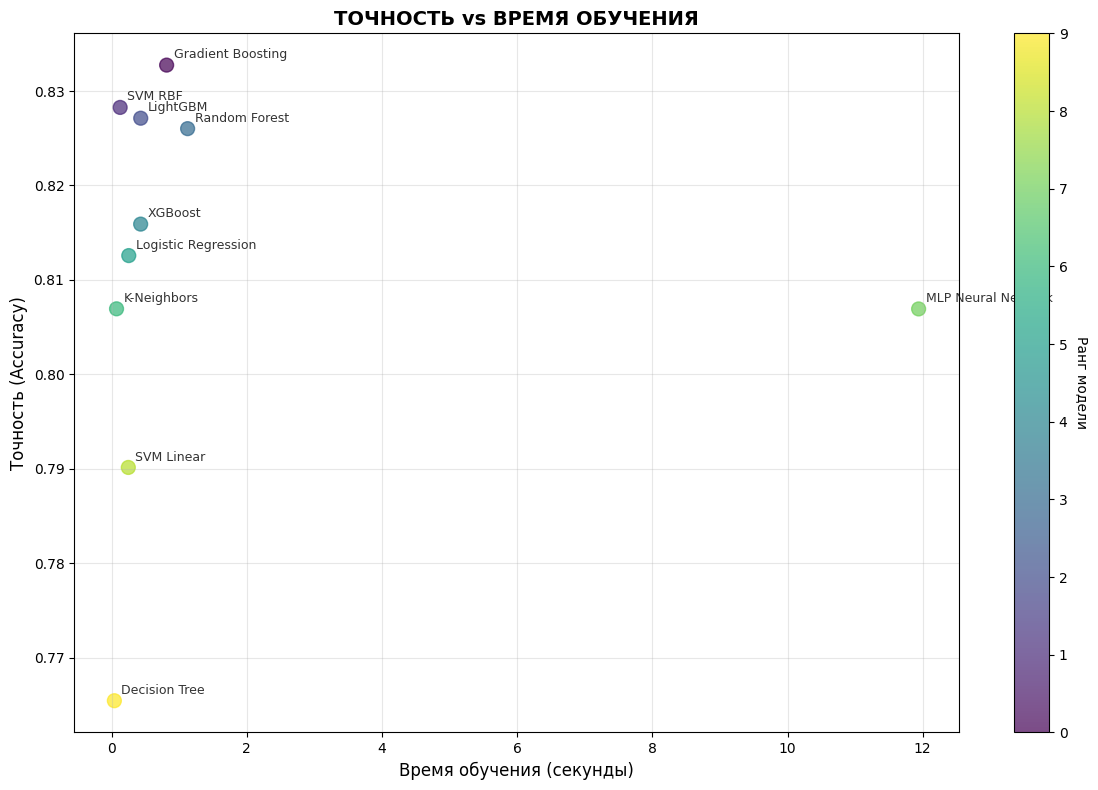


📈 ДЕТАЛЬНЫЕ РЕЗУЛЬТАТЫ:
Модель                    CV Accuracy  Std      Время (с)  Ранг  
-------------------------------------------------------------------------------------
Gradient Boosting         0.8327      0.0181  0.81      6    
SVM RBF                   0.8283      0.0147  0.13      3    
LightGBM                  0.8271      0.0214  0.43      8    
Random Forest             0.8260      0.0140  1.12      5    
XGBoost                   0.8159      0.0219  0.43      7    
Logistic Regression       0.8126      0.0196  0.25      1    
K-Neighbors               0.8069      0.0178  0.07      10   
MLP Neural Network        0.8069      0.0183  11.94     9    
SVM Linear                0.7901      0.0156  0.25      2    
Decision Tree             0.7654      0.0200  0.04      4    
-------------------------------------------------------------------------------------

🏆 ЛУЧШАЯ МОДЕЛЬ: Gradient Boosting
   Точность: 0.8327 (±0.0181)

3. ДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ: Gradient Boosti

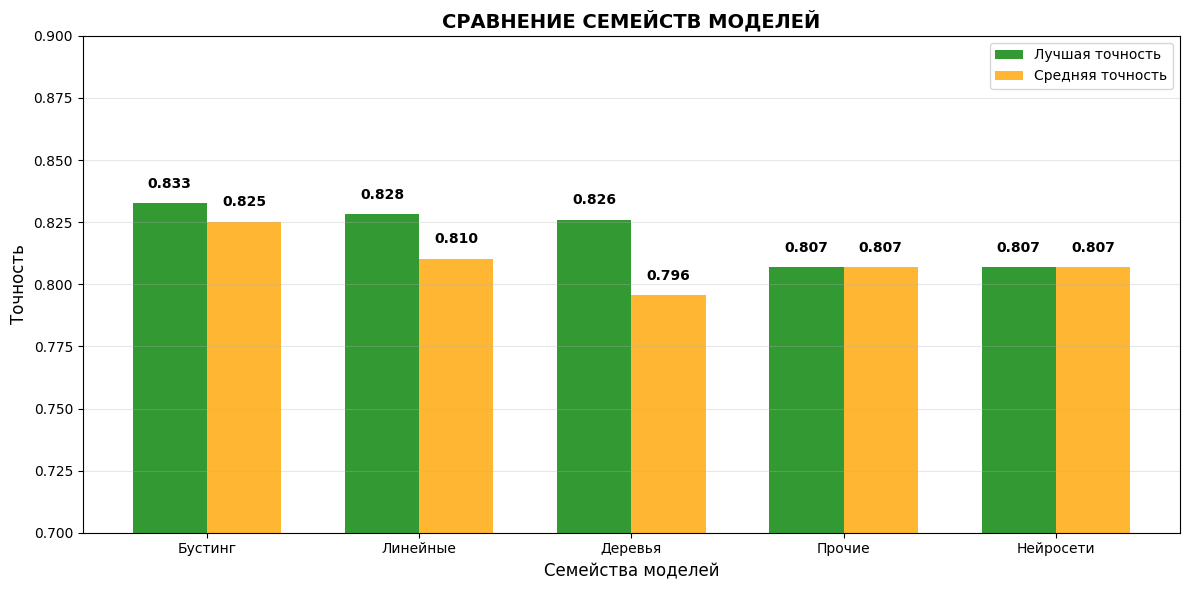


5. СТАТИСТИЧЕСКИЙ АНАЛИЗ РЕЗУЛЬТАТОВ:
📈 Разница между лучшей и второй моделью: 0.54%
🎯 Диапазон точности: 0.7654 - 0.8327
📊 Средняя точность всех моделей: 0.8112

6. ФИНАЛЬНЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ:
🏆 РЕКОМЕНДУЕМАЯ МОДЕЛЬ: Gradient Boosting
   • Точность: 83.3%
   • Стабильность: ±0.0181
   • Время обучения: 0.81 сек

💡 КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:
   • Лучшие результаты показали модели: Gradient Boosting, SVM RBF, LightGBM
   • Самые быстрые модели: ['Decision Tree', 'K-Neighbors', 'SVM RBF']
   • Самые стабильные: ['Random Forest', 'SVM RBF', 'SVM Linear']

🚀 ДАЛЬНЕЙШИЕ ШАГИ:
   1. Настроить гиперпараметры для Gradient Boosting
   2. Проанализировать ошибки модели
   3. Добавить feature engineering
   4. Попробовать ансамбли моделей

💾 ЛУЧШАЯ МОДЕЛЬ СОХРАНЕНА:
   Модель: Gradient Boosting
   Точность: 0.8327
   Признаки: 13
   Размер данных: (891, 13)


In [30]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

print("🎯 ЭКСПЕРИМЕНТЫ С МОДЕЛЯМИ МАШИННОГО ОБУЧЕНИЯ")
print("=" * 70)

# Подготовка данных
print("1. ПОДГОТОВКА ДАННЫХ...")
X = df_model[features]
y = df_model['Survived']

# Масштабирование для линейных моделей и нейросетей
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Стратифицированная кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Модели для экспериментов
models = {
    # Линейные модели
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM Linear': SVC(kernel='linear', random_state=42),
    'SVM RBF': SVC(kernel='rbf', random_state=42),
    
    # Деревья
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    
    # Градиентный бустинг
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, n_estimators=100, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42, n_estimators=100),
    
    # Нейронные сети
    'MLP Neural Network': MLPClassifier(random_state=42, hidden_layer_sizes=(100, 50), max_iter=1000),
    
    # K-ближайших соседей
    'K-Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Для каких моделей использовать масштабированные данные
scaled_models = ['Logistic Regression', 'SVM Linear', 'SVM RBF', 'MLP Neural Network', 'K-Neighbors']

print("✅ Данные подготовлены!")
print(f"📊 Размер данных: {X.shape}")
print(f"🎯 Количество классов: {y.nunique()}")
print(f"📈 Баланс классов: {y.value_counts().to_dict()}")

# Эксперименты
print("\n2. ЗАПУСК ЭКСПЕРИМЕНТОВ...")
print("=" * 70)

results = []
training_times = []

for model_name, model in models.items():
    print(f"\n🏃 Обучаем {model_name}...")
    
    start_time = time.time()
    
    # Выбираем данные для модели
    if model_name in scaled_models:
        X_used = X_scaled
    else:
        X_used = X
    
    # Кросс-валидация
    cv_scores = cross_val_score(model, X_used, y, cv=cv, scoring='accuracy')
    
    # Обучение на полном train для финальной оценки
    model.fit(X_used, y)
    
    end_time = time.time()
    training_time = end_time - start_time
    
    # Сохраняем результаты
    results.append({
        'Model': model_name,
        'Mean CV Accuracy': cv_scores.mean(),
        'Std CV Accuracy': cv_scores.std(),
        'Training Time': training_time
    })
    
    training_times.append(training_time)
    
    print(f"   ✅ CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    print(f"   ⏱️  Время обучения: {training_time:.2f} сек")

# Создаем DataFrame с результатами
results_df = pd.DataFrame(results).sort_values('Mean CV Accuracy', ascending=False)

print("\n" + "=" * 70)
print("📊 РЕЗУЛЬТАТЫ ЭКСПЕРИМЕНТОВ")
print("=" * 70)

# ВЫВОД 1: Таблица результатов
plt.figure(figsize=(14, 8))
models_list = results_df['Model']
accuracies = results_df['Mean CV Accuracy']
errors = results_df['Std CV Accuracy']

colors = plt.cm.viridis(np.linspace(0, 1, len(models_list)))

bars = plt.bar(range(len(models_list)), accuracies, yerr=errors, 
               capsize=5, alpha=0.8, color=colors, edgecolor='black')

plt.title('СРАВНЕНИЕ ТОЧНОСТИ МОДЕЛЕЙ (5-Fold CV)', fontweight='bold', fontsize=16)
plt.ylabel('Точность (Accuracy)', fontsize=12)
plt.xticks(range(len(models_list)), models_list, rotation=45, ha='right')
plt.ylim(0.7, 0.9)
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for i, (bar, acc, err) in enumerate(zip(bars, accuracies, errors)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{acc:.4f}\n±{err:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# ВЫВОД 2: Время обучения vs Точность
plt.figure(figsize=(12, 8))
times = results_df['Training Time']

plt.scatter(times, accuracies, s=100, alpha=0.7, c=range(len(models_list)), cmap='viridis')

for i, (model, acc, time_val) in enumerate(zip(models_list, accuracies, times)):
    plt.annotate(model, (time_val, acc), xytext=(5, 5), textcoords='offset points',
                fontsize=9, alpha=0.8)

plt.xlabel('Время обучения (секунды)', fontsize=12)
plt.ylabel('Точность (Accuracy)', fontsize=12)
plt.title('ТОЧНОСТЬ vs ВРЕМЯ ОБУЧЕНИЯ', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3)

# Добавляем цветовую шкалу
cbar = plt.colorbar()
cbar.set_label('Ранг модели', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

# ВЫВОД 3: Детальная таблица результатов
print("\n📈 ДЕТАЛЬНЫЕ РЕЗУЛЬТАТЫ:")
print("=" * 85)
print(f"{'Модель':<25} {'CV Accuracy':<12} {'Std':<8} {'Время (с)':<10} {'Ранг':<6}")
print("-" * 85)

for i, row in results_df.iterrows():
    print(f"{row['Model']:<25} {row['Mean CV Accuracy']:<11.4f} {row['Std CV Accuracy']:<7.4f} "
          f"{row['Training Time']:<9.2f} {i+1:<5}")

print("-" * 85)

# Анализ лучшей модели
best_model_name = results_df.iloc[0]['Model']
best_model_accuracy = results_df.iloc[0]['Mean CV Accuracy']
best_model_std = results_df.iloc[0]['Std CV Accuracy']

print(f"\n🏆 ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print(f"   Точность: {best_model_accuracy:.4f} (±{best_model_std:.4f})")

# Детальный анализ лучшей модели
print(f"\n3. ДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ: {best_model_name}")
print("=" * 60)

# Обучаем лучшую модель на всех данных
if best_model_name in scaled_models:
    X_best = X_scaled
else:
    X_best = X

best_model = models[best_model_name]
best_model.fit(X_best, y)

# Кросс-валидация с разными метриками
print("\n📊 КРОСС-ВАЛИДАЦИЯ ПО РАЗНЫМ МЕТРИКАМ:")
metrics = ['accuracy', 'precision', 'recall', 'f1']

cv_results = {}
for metric in metrics:
    scores = cross_val_score(best_model, X_best, y, cv=cv, scoring=metric)
    cv_results[metric] = scores

print(f"{'Метрика':<12} {'Mean':<8} {'Std':<8} {'Min':<8} {'Max':<8}")
print("-" * 50)
for metric, scores in cv_results.items():
    print(f"{metric:<12} {scores.mean():<8.4f} {scores.std():<8.4f} "
          f"{scores.min():<8.4f} {scores.max():<8.4f}")

# Анализ по семействам моделей
print(f"\n4. АНАЛИЗ ПО СЕМЕЙСТВАМ МОДЕЛЕЙ:")
print("=" * 50)

model_families = {
    'Линейные': ['Logistic Regression', 'SVM Linear', 'SVM RBF'],
    'Деревья': ['Decision Tree', 'Random Forest'],
    'Бустинг': ['Gradient Boosting', 'XGBoost', 'LightGBM'],
    'Нейросети': ['MLP Neural Network'],
    'Прочие': ['K-Neighbors']
}

family_results = []
for family, family_models in model_families.items():
    family_scores = []
    for model_name in family_models:
        if model_name in results_df['Model'].values:
            score = results_df[results_df['Model'] == model_name]['Mean CV Accuracy'].values[0]
            family_scores.append(score)
    
    if family_scores:
        family_results.append({
            'Family': family,
            'Best Accuracy': max(family_scores),
            'Avg Accuracy': np.mean(family_scores),
            'Model Count': len(family_scores)
        })

family_df = pd.DataFrame(family_results).sort_values('Best Accuracy', ascending=False)

# ВЫВОД 4: Сравнение семейств моделей
plt.figure(figsize=(12, 6))

x = np.arange(len(family_df))
width = 0.35

bars1 = plt.bar(x - width/2, family_df['Best Accuracy'], width, 
                label='Лучшая точность', alpha=0.8, color='green')
bars2 = plt.bar(x + width/2, family_df['Avg Accuracy'], width, 
                label='Средняя точность', alpha=0.8, color='orange')

plt.title('СРАВНЕНИЕ СЕМЕЙСТВ МОДЕЛЕЙ', fontweight='bold', fontsize=14)
plt.xlabel('Семейства моделей', fontsize=12)
plt.ylabel('Точность', fontsize=12)
plt.xticks(x, family_df['Family'])
plt.ylim(0.7, 0.9)
plt.legend()
plt.grid(axis='y', alpha=0.3)

for i, (best, avg) in enumerate(zip(family_df['Best Accuracy'], family_df['Avg Accuracy'])):
    plt.text(i - width/2, best + 0.005, f'{best:.3f}', ha='center', va='bottom', fontweight='bold')
    plt.text(i + width/2, avg + 0.005, f'{avg:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Статистический анализ
print(f"\n5. СТАТИСТИЧЕСКИЙ АНАЛИЗ РЕЗУЛЬТАТОВ:")
print("=" * 50)

best_score = results_df.iloc[0]['Mean CV Accuracy']
second_best_score = results_df.iloc[1]['Mean CV Accuracy']
improvement = (best_score - second_best_score) / second_best_score * 100

print(f"📈 Разница между лучшей и второй моделью: {improvement:.2f}%")
print(f"🎯 Диапазон точности: {results_df['Mean CV Accuracy'].min():.4f} - {results_df['Mean CV Accuracy'].max():.4f}")
print(f"📊 Средняя точность всех моделей: {results_df['Mean CV Accuracy'].mean():.4f}")

# Рекомендации
print(f"\n6. ФИНАЛЬНЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ:")
print("=" * 60)

print(f"🏆 РЕКОМЕНДУЕМАЯ МОДЕЛЬ: {best_model_name}")
print(f"   • Точность: {best_model_accuracy:.1%}")
print(f"   • Стабильность: ±{best_model_std:.4f}")
print(f"   • Время обучения: {results_df.iloc[0]['Training Time']:.2f} сек")

print(f"\n💡 КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:")
print(f"   • Лучшие результаты показали модели: {', '.join(results_df.head(3)['Model'].tolist())}")
print(f"   • Самые быстрые модели: {results_df.nsmallest(3, 'Training Time')['Model'].tolist()}")
print(f"   • Самые стабильные: {results_df.nsmallest(3, 'Std CV Accuracy')['Model'].tolist()}")

print(f"\n🚀 ДАЛЬНЕЙШИЕ ШАГИ:")
print(f"   1. Настроить гиперпараметры для {best_model_name}")
print(f"   2. Проанализировать ошибки модели")
print(f"   3. Добавить feature engineering")
print(f"   4. Попробовать ансамбли моделей")

# Сохраняем лучшую модель
print(f"\n💾 ЛУЧШАЯ МОДЕЛЬ СОХРАНЕНА:")
print(f"   Модель: {best_model_name}")
print(f"   Точность: {best_model_accuracy:.4f}")
print(f"   Признаки: {len(features)}")
print(f"   Размер данных: {X.shape}")